In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

from judgemark_v2lp.utils.file_io import load_json_file, save_json_file
from judgemark_v2lp.benchmark import sanitize_model_name, finalize_scores_and_compute_judgemark
import uuid
from tqdm import tqdm


In [3]:
run_id=None

samples_file = "../data/judgemark_v2.1_samples.json"
samples_data = load_json_file(samples_file)
json_file = "../outputs/my_judgemark_runs2.json"
runs = load_json_file(json_file)
print(f"Loaded {runs.keys()} from {json_file}")
run_id = list(runs.keys())[0]
_, judge_model = run_id.split("__")
judge_model

Loaded dict_keys(['705a977b-fe50-4733-b1ce-b1d69680587f__deepseek_deepseek-chat-v3-0324']) from ../outputs/my_judgemark_runs2.json


'deepseek_deepseek-chat-v3-0324'

In [4]:
from loguru import logger
import sys
logger.remove()
logger.add(sys.stderr, level="INFO", format="{message}")

import os
os.chdir("../")

In [5]:
run = runs[run_id]
judge_model = run['judge_model']
run.keys()

dict_keys(['judge_model', 'start_time', 'status', 'samples_file', 'prompts_file', 'results', 'end_time', 'raw_score_distribution', 'calibration_config', 'calibrated_score_distribution', 'raw_model_stats', 'calibrated_model_stats', 'raw_cross_model_stats', 'calibrated_cross_model_stats', 'separability_metrics', 'iteration_stability', 'raw_score_range', 'final_judgemark_score_elements_raw', 'final_judgemark_score_raw', 'calibrated_score_range', 'final_judgemark_score_elements_calibrated', 'final_judgemark_score'])

In [6]:
from judgemark_v2lp.scoring import compute_ranked_score, compute_raw_score, compute_weighted_score
import numpy as np
from tqdm.auto import tqdm



results = {}

## Normal ranked


--- RAW SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 1.000
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 8.056
CI99 Overlap pct: 0.498
Avg. |Cohen's d| for adjacent pairs: 0.239
Average EMD across all pairs: 1.546
Avg. CI95 half-width: 0.190 (modulated: 0.683)


--- CALIBRATED SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 1.000
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 10.613
CI99 Overlap pct: 0.503
Avg. |Cohen's d| for adjacent pairs: 0.236
Average EMD across all pairs: 2.017
Avg. CI95 half-width: 0.248 (modulated: 0.528)



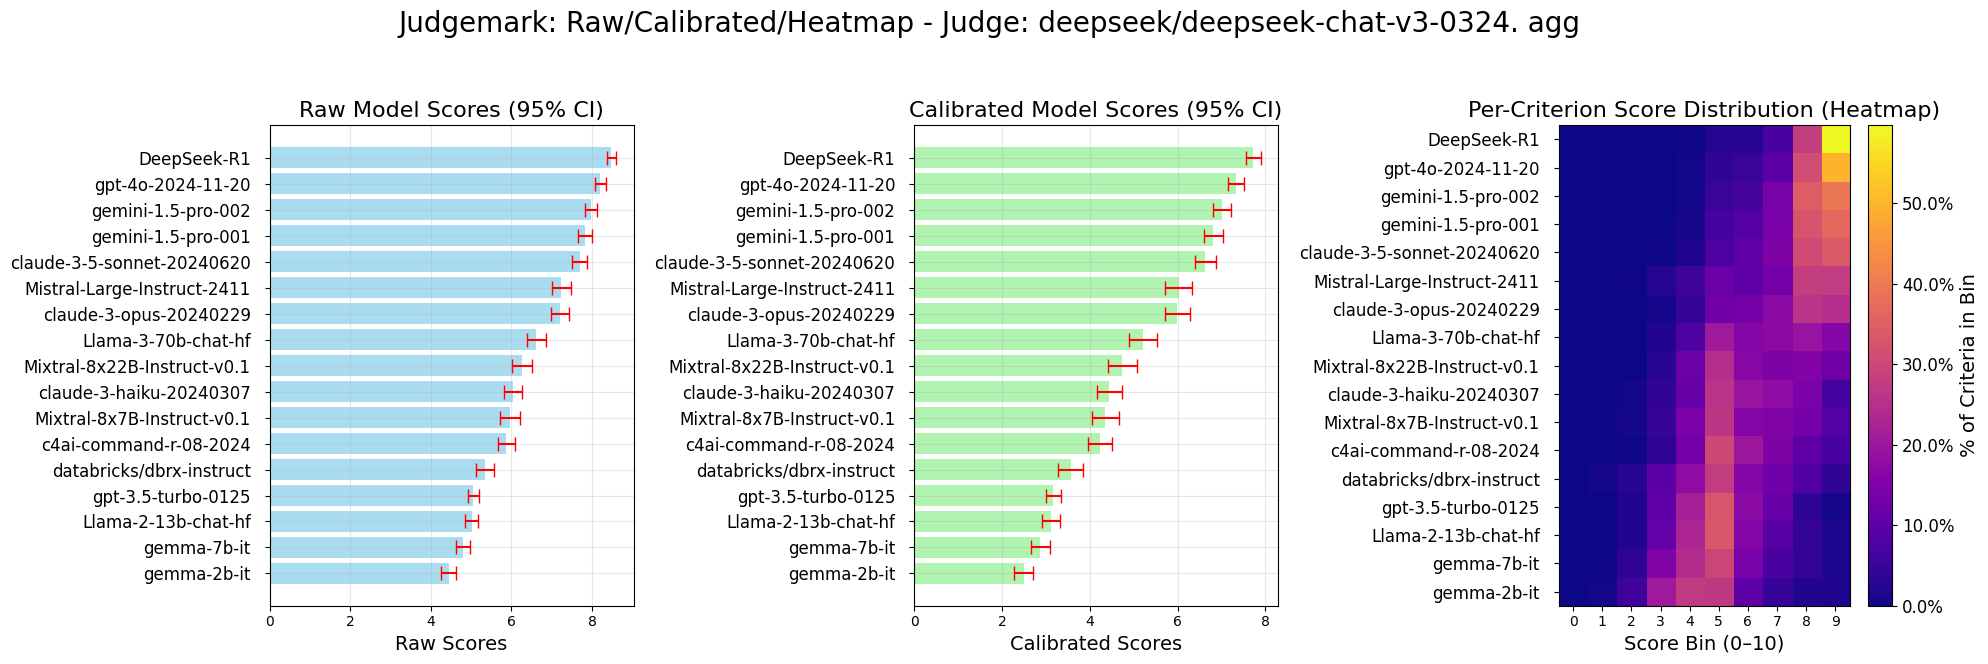

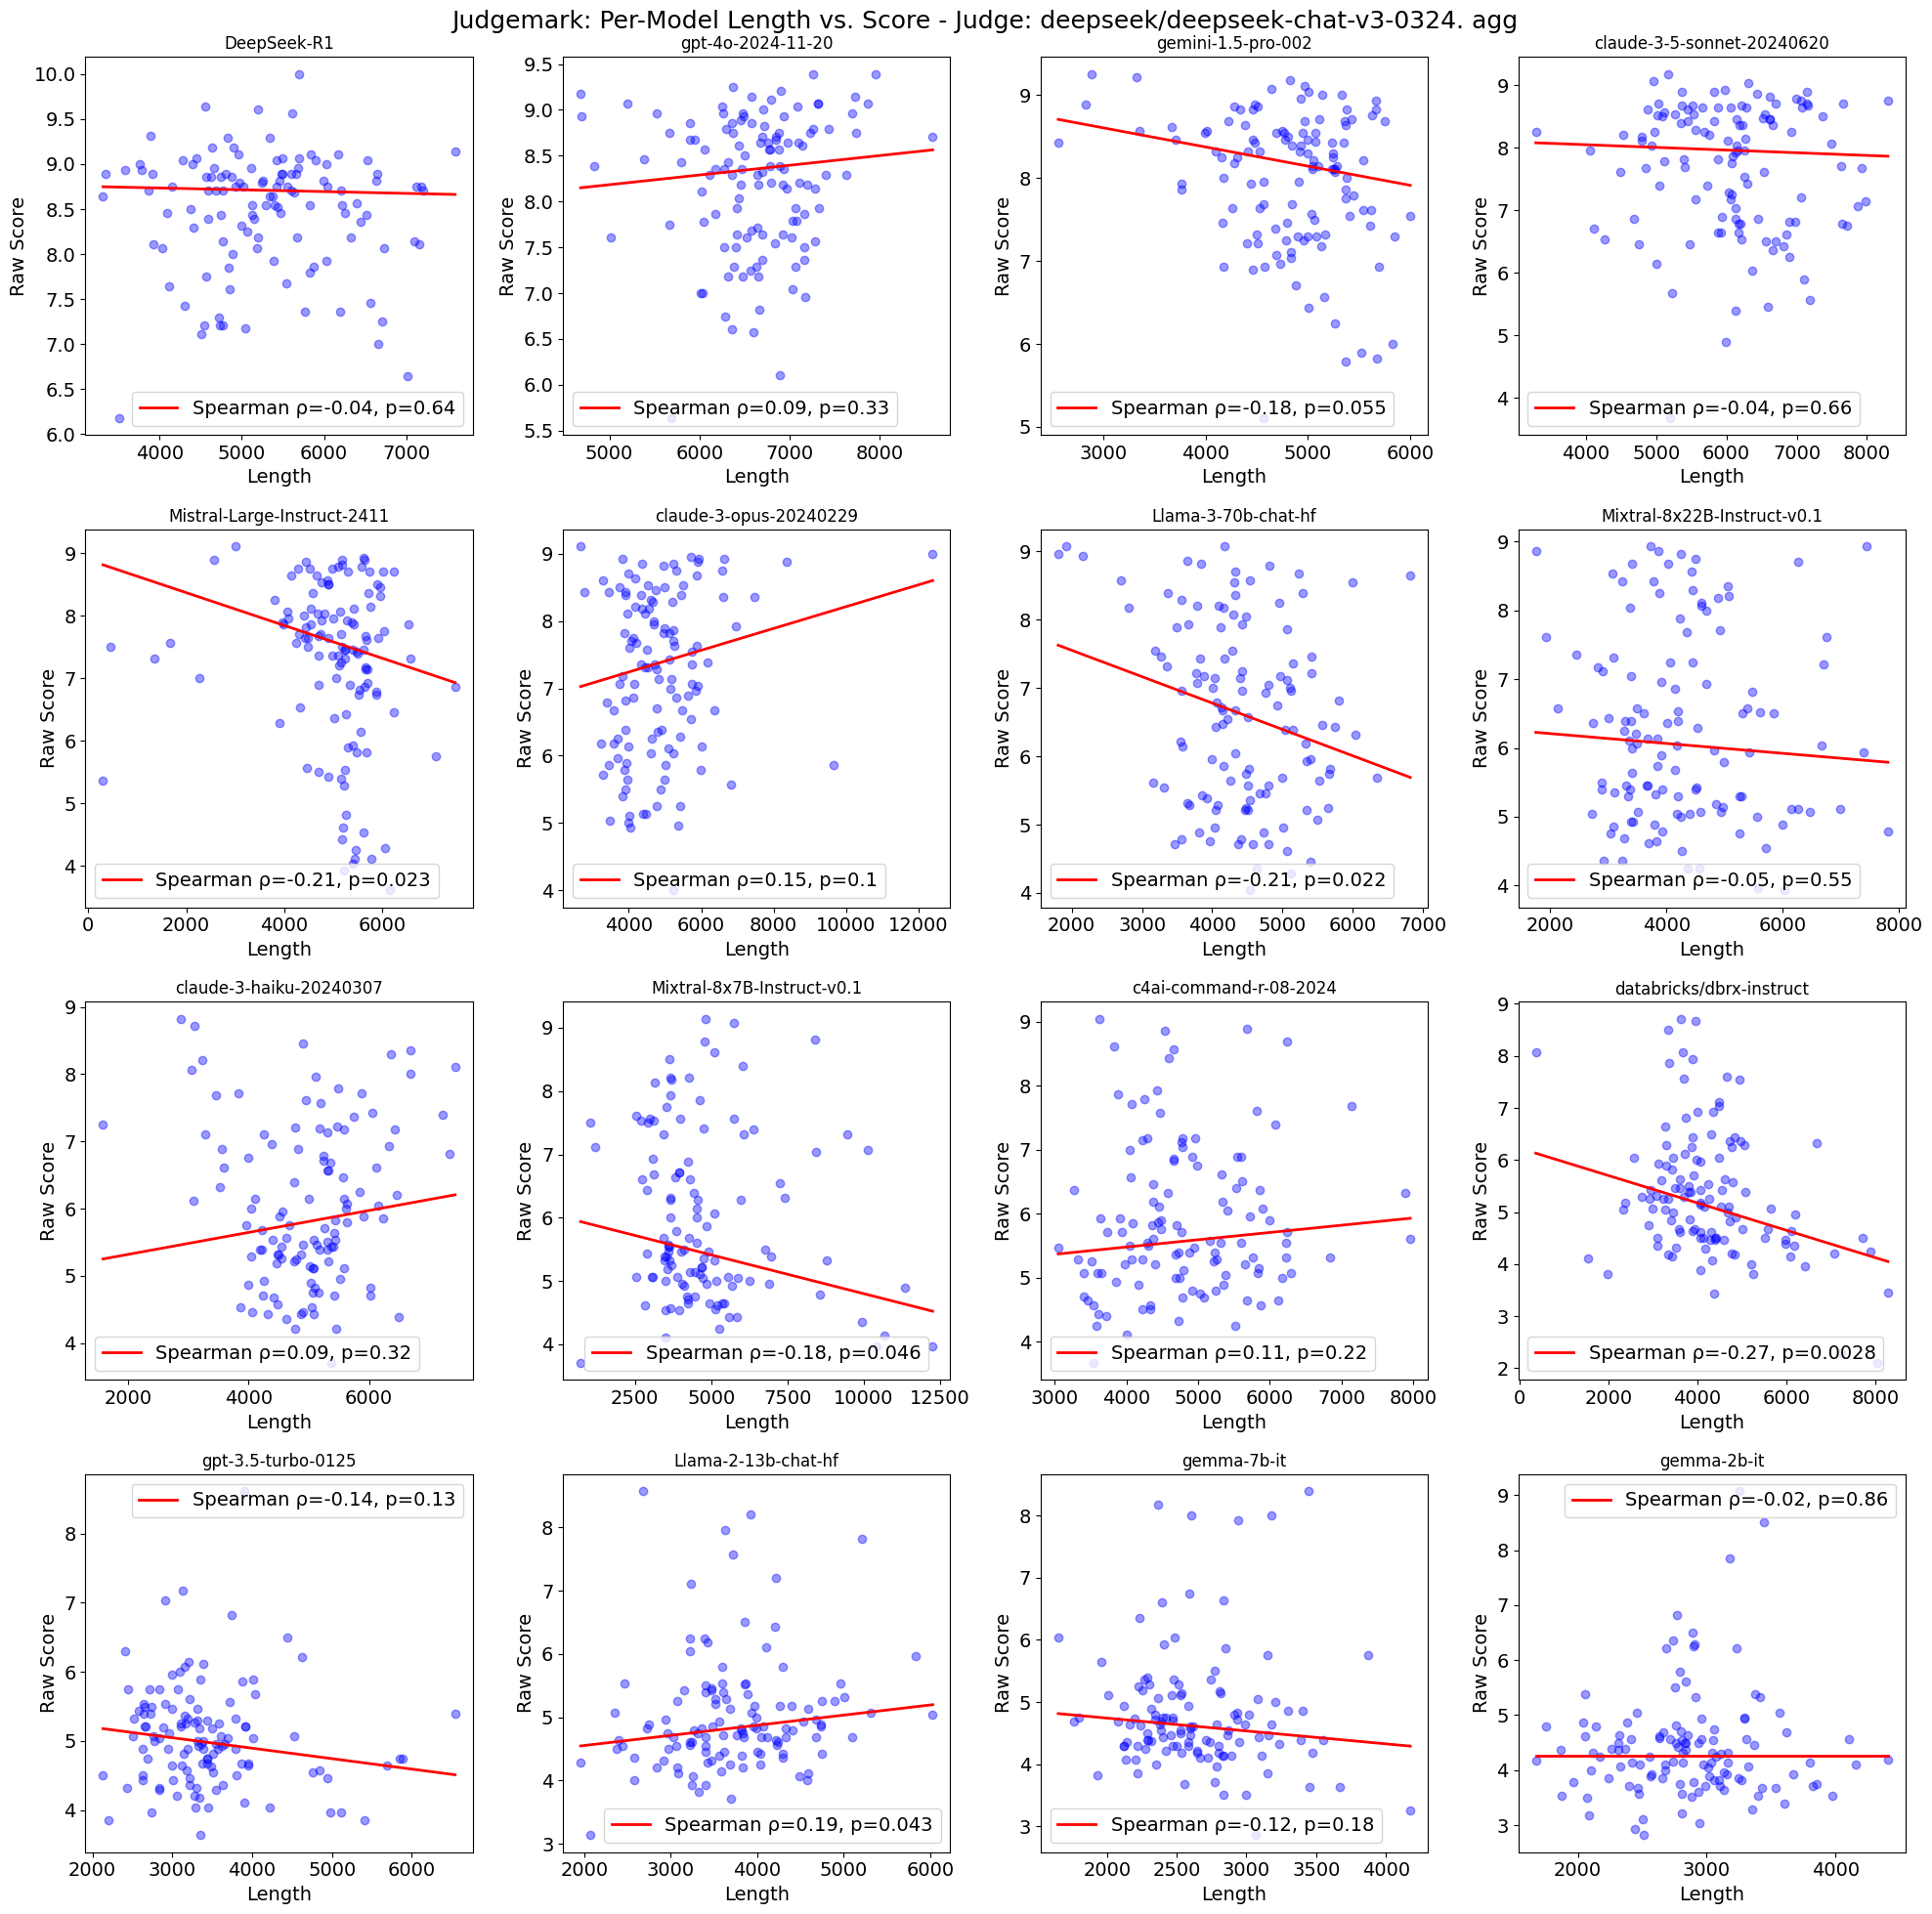


------- RAW SCORES Summary -------ANOVA F-value: 173.2957, p=0.0000Kruskal-Wallis: 1163.6088, p=0.0000Pearson r=0.9649Kendall τ=0.8971Std.Dev across models: 1.2609
Model Scores:DeepSeek-R1............................. 8.483 ±0.118gpt-4o-2024-11-20....................... 8.209 ±0.133gemini-1.5-pro-002...................... 7.982 ±0.147gemini-1.5-pro-001...................... 7.834 ±0.170claude-3-5-sonnet-20240620.............. 7.691 ±0.186Mistral-Large-Instruct-2411............. 7.236 ±0.237claude-3-opus-20240229.................. 7.212 ±0.219Llama-3-70b-chat-hf..................... 6.618 ±0.239Mixtral-8x22B-Instruct-v0.1............. 6.262 ±0.245claude-3-haiku-20240307................. 6.038 ±0.213Mixtral-8x7B-Instruct-v0.1.............. 5.967 ±0.237c4ai-command-r-08-2024.................. 5.876 ±0.212databricks/dbrx-instruct................ 5.338 ±0.221gpt-3.5-turbo-0125...................... 5.056 ±0.134Llama-2-13b-chat-hf..................... 5.013 ±0.162gemma-7b-it................

In [7]:
results['weighted'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_weighted", do_plot=1)


--- RAW SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 1.000
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 8.092
CI99 Overlap pct: 0.499
Avg. |Cohen's d| for adjacent pairs: 0.238
Average EMD across all pairs: 1.544
Avg. CI95 half-width: 0.190 (modulated: 0.681)


--- CALIBRATED SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 1.000
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 10.583
CI99 Overlap pct: 0.504
Avg. |Cohen's d| for adjacent pairs: 0.235
Average EMD across all pairs: 2.002
Avg. CI95 half-width: 0.247 (modulated: 0.530)



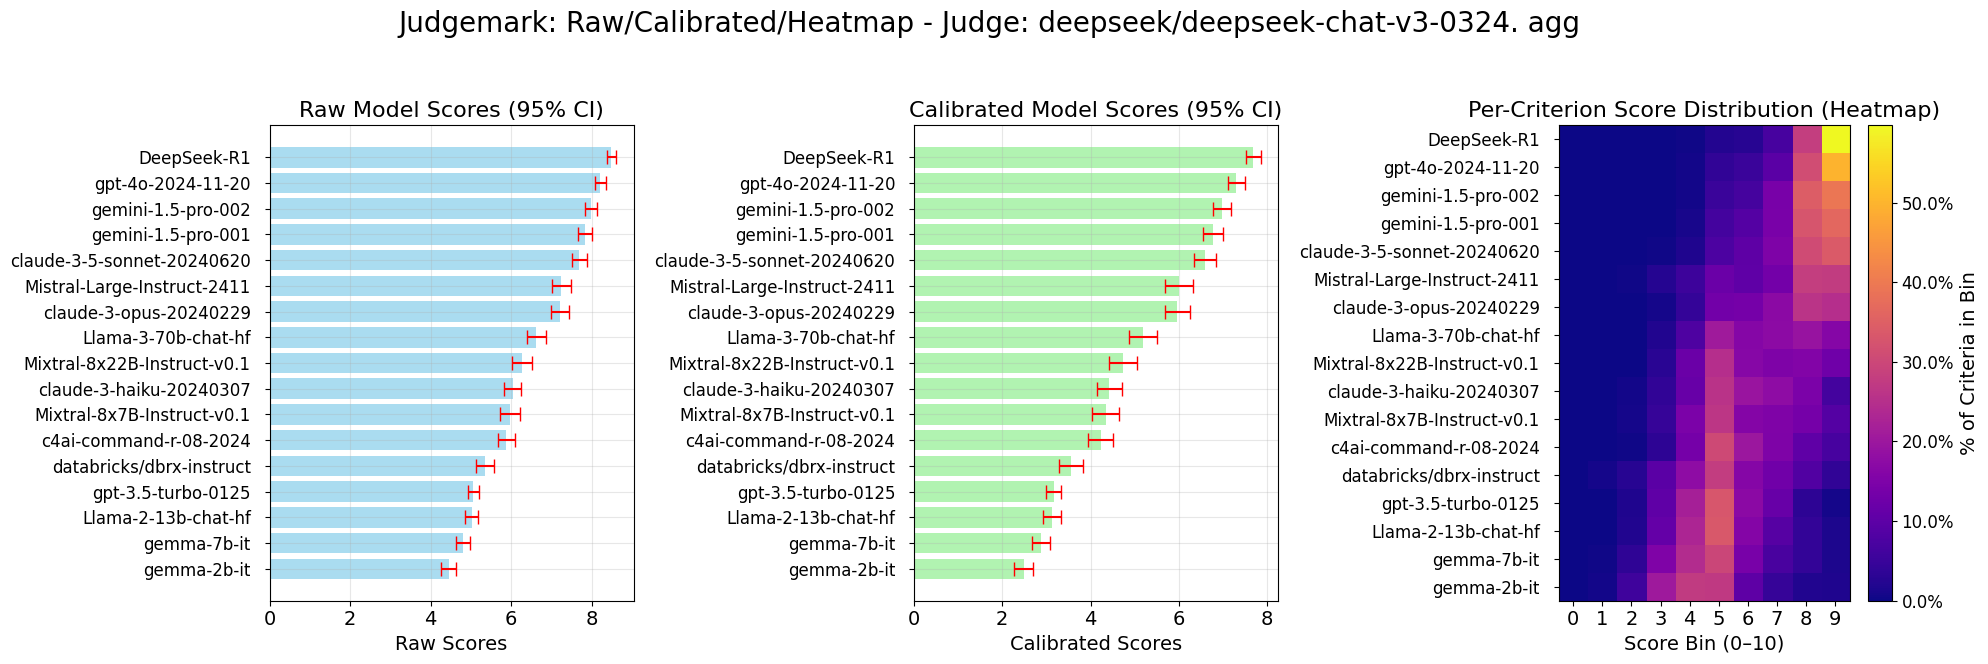

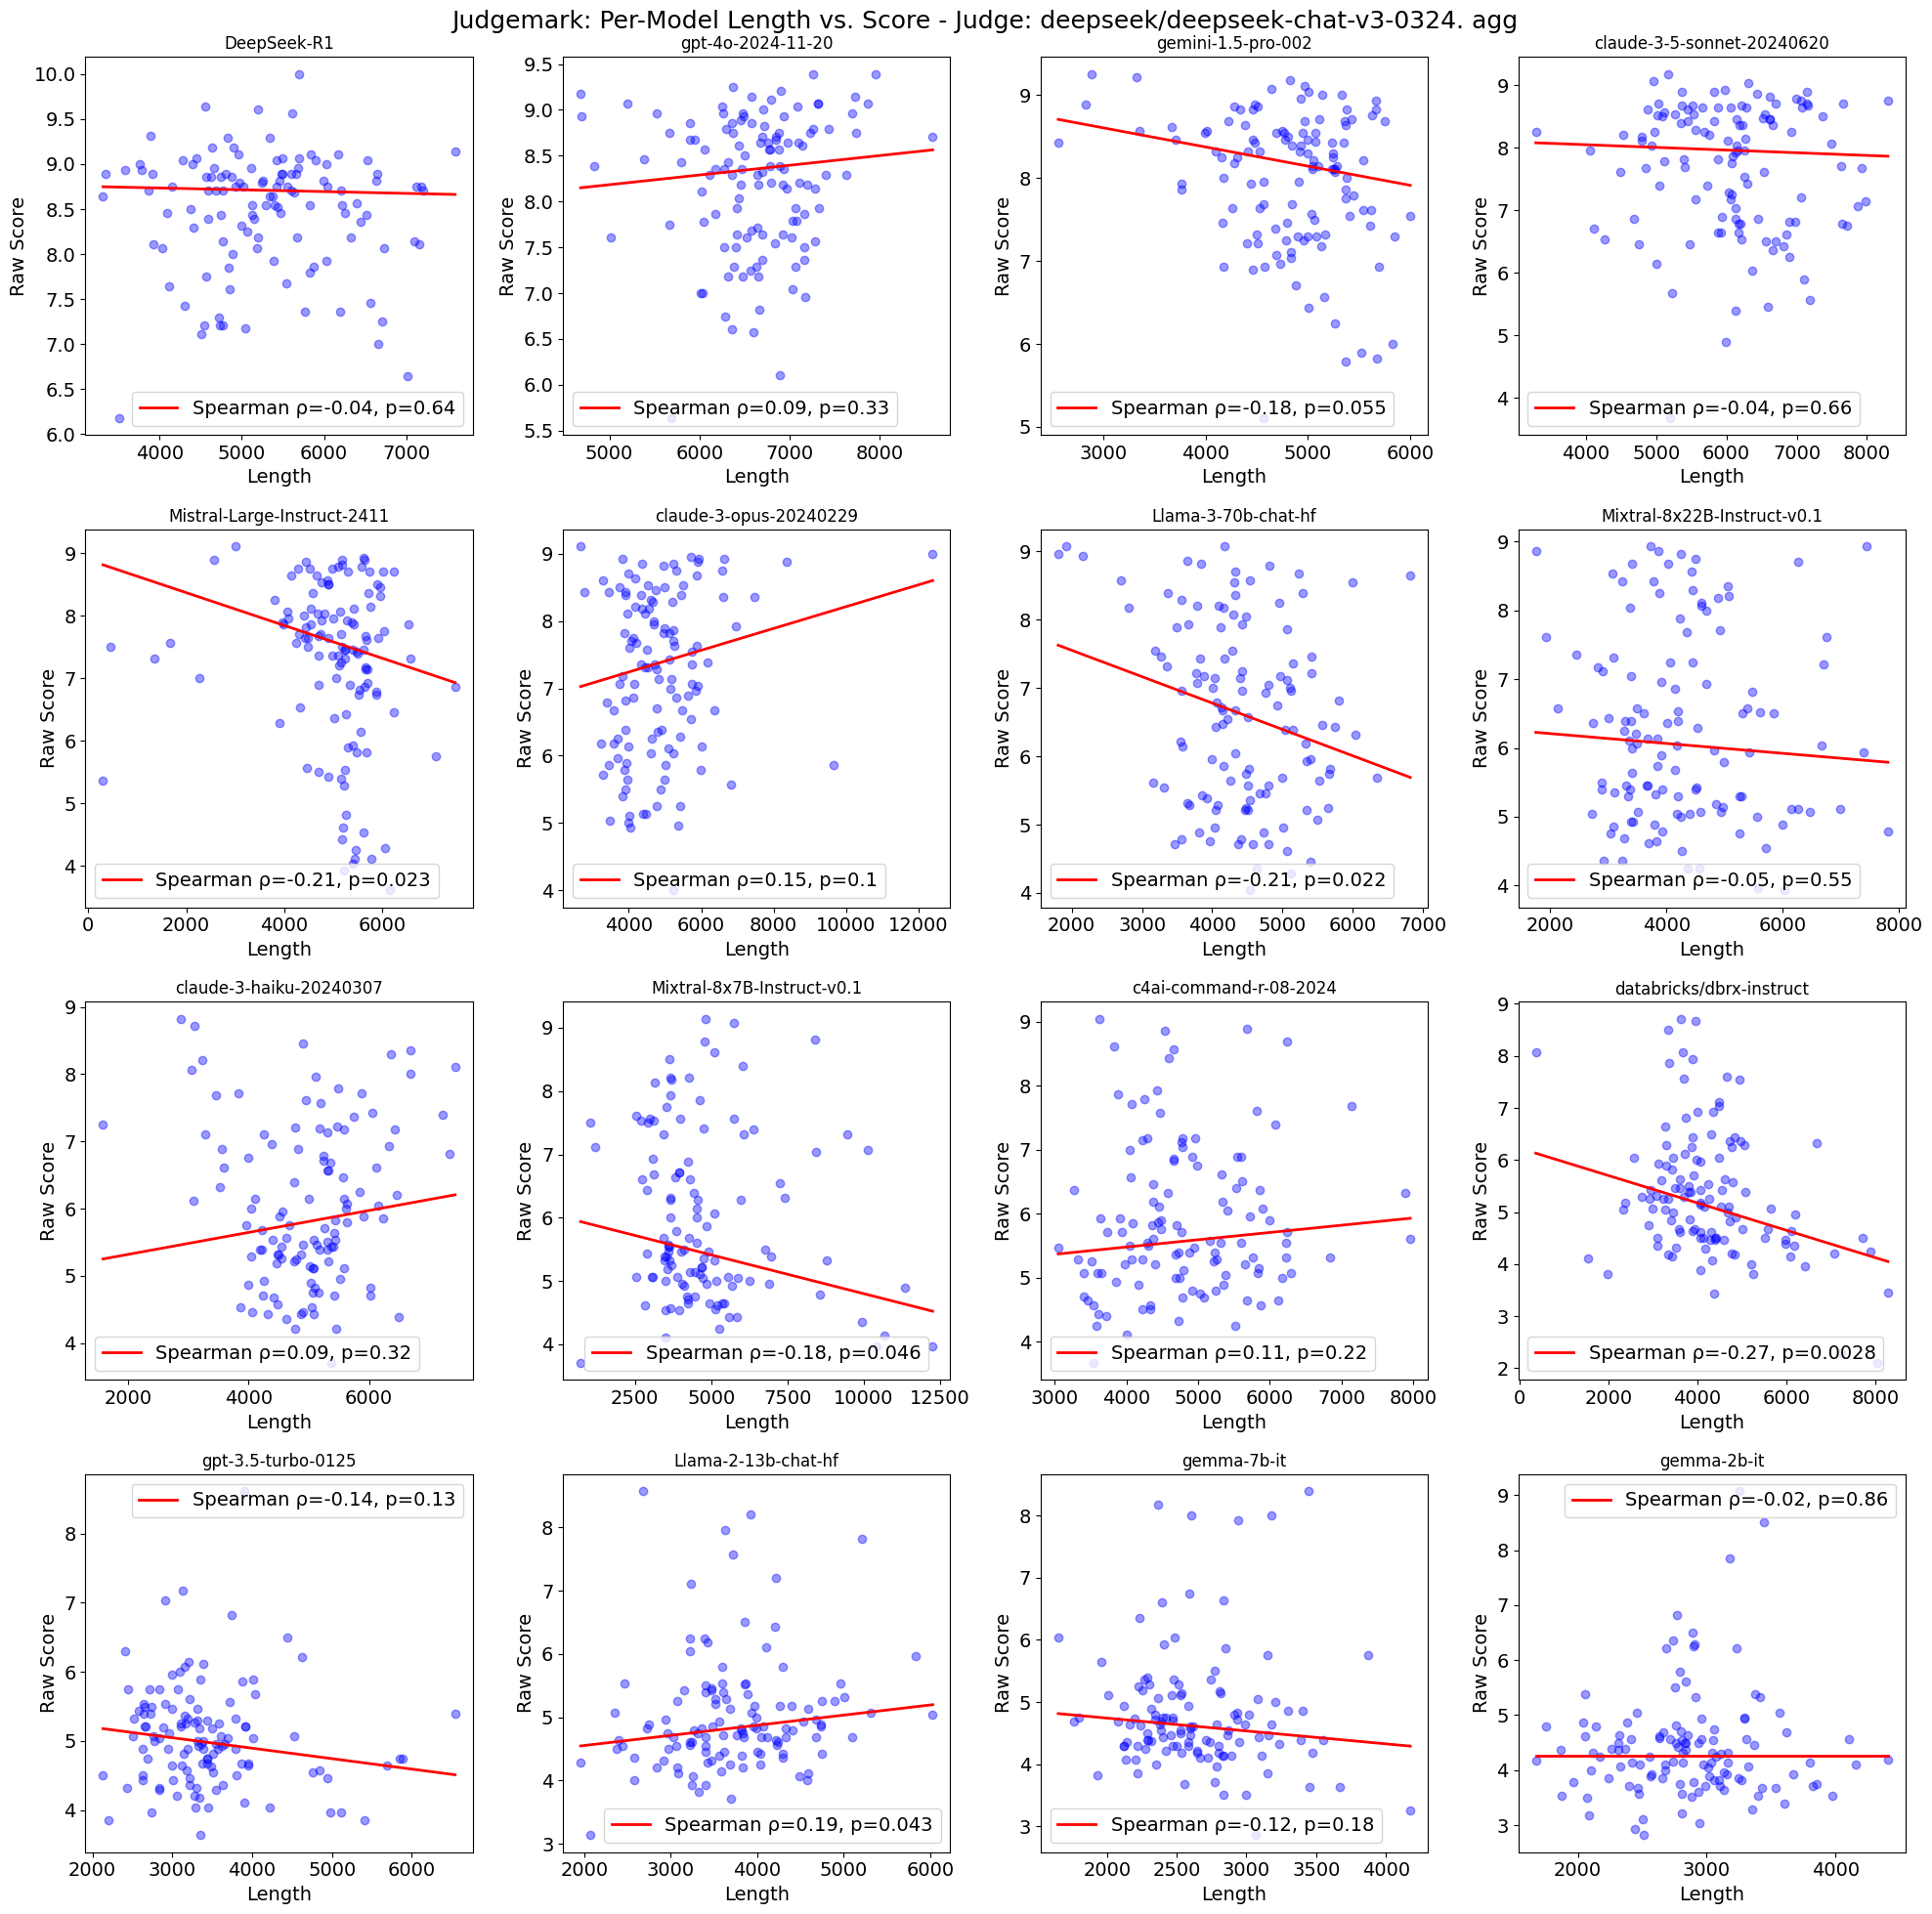


------- RAW SCORES Summary -------ANOVA F-value: 171.8516, p=0.0000Kruskal-Wallis: 1159.3220, p=0.0000Pearson r=0.9650Kendall τ=0.9000Std.Dev across models: 1.2596
Model Scores:DeepSeek-R1............................. 8.486 ±0.119gpt-4o-2024-11-20....................... 8.214 ±0.134gemini-1.5-pro-002...................... 7.977 ±0.147gemini-1.5-pro-001...................... 7.833 ±0.169claude-3-5-sonnet-20240620.............. 7.689 ±0.188Mistral-Large-Instruct-2411............. 7.238 ±0.238claude-3-opus-20240229.................. 7.212 ±0.220Llama-3-70b-chat-hf..................... 6.621 ±0.240Mixtral-8x22B-Instruct-v0.1............. 6.270 ±0.245claude-3-haiku-20240307................. 6.036 ±0.214Mixtral-8x7B-Instruct-v0.1.............. 5.969 ±0.238c4ai-command-r-08-2024.................. 5.881 ±0.212databricks/dbrx-instruct................ 5.340 ±0.220gpt-3.5-turbo-0125...................... 5.061 ±0.134Llama-2-13b-chat-hf..................... 5.019 ±0.163gemma-7b-it................

In [8]:
# sanitized_jm = sanitize_model_name(judge_model)
# base_id = run_id if run_id else str(uuid.uuid4())
# run_key = f"{base_id}__{sanitized_jm}"
# Compute final stats
results['raw'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_raw", do_plot=1)


--- RAW SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 1.000
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 0.838
CI99 Overlap pct: 0.840
Avg. |Cohen's d| for adjacent pairs: 0.061
Average EMD across all pairs: 0.040
Avg. CI95 half-width: 0.015 (modulated: 0.475)


--- CALIBRATED SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 1.000
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 16.620
CI99 Overlap pct: 0.829
Avg. |Cohen's d| for adjacent pairs: 0.071
Average EMD across all pairs: 0.916
Avg. CI95 half-width: 0.305 (modulated: 0.214)



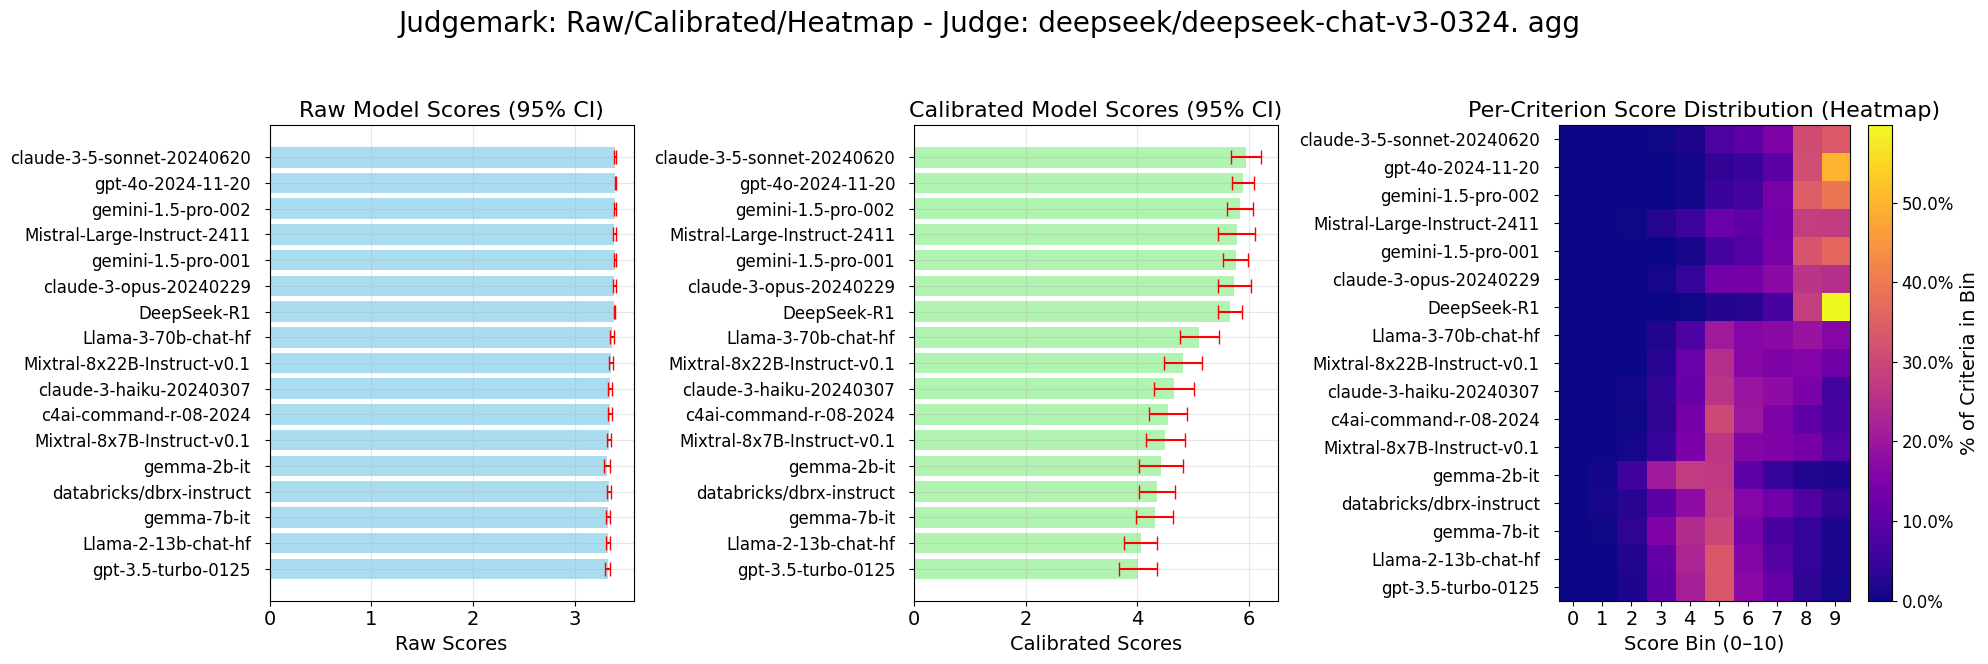

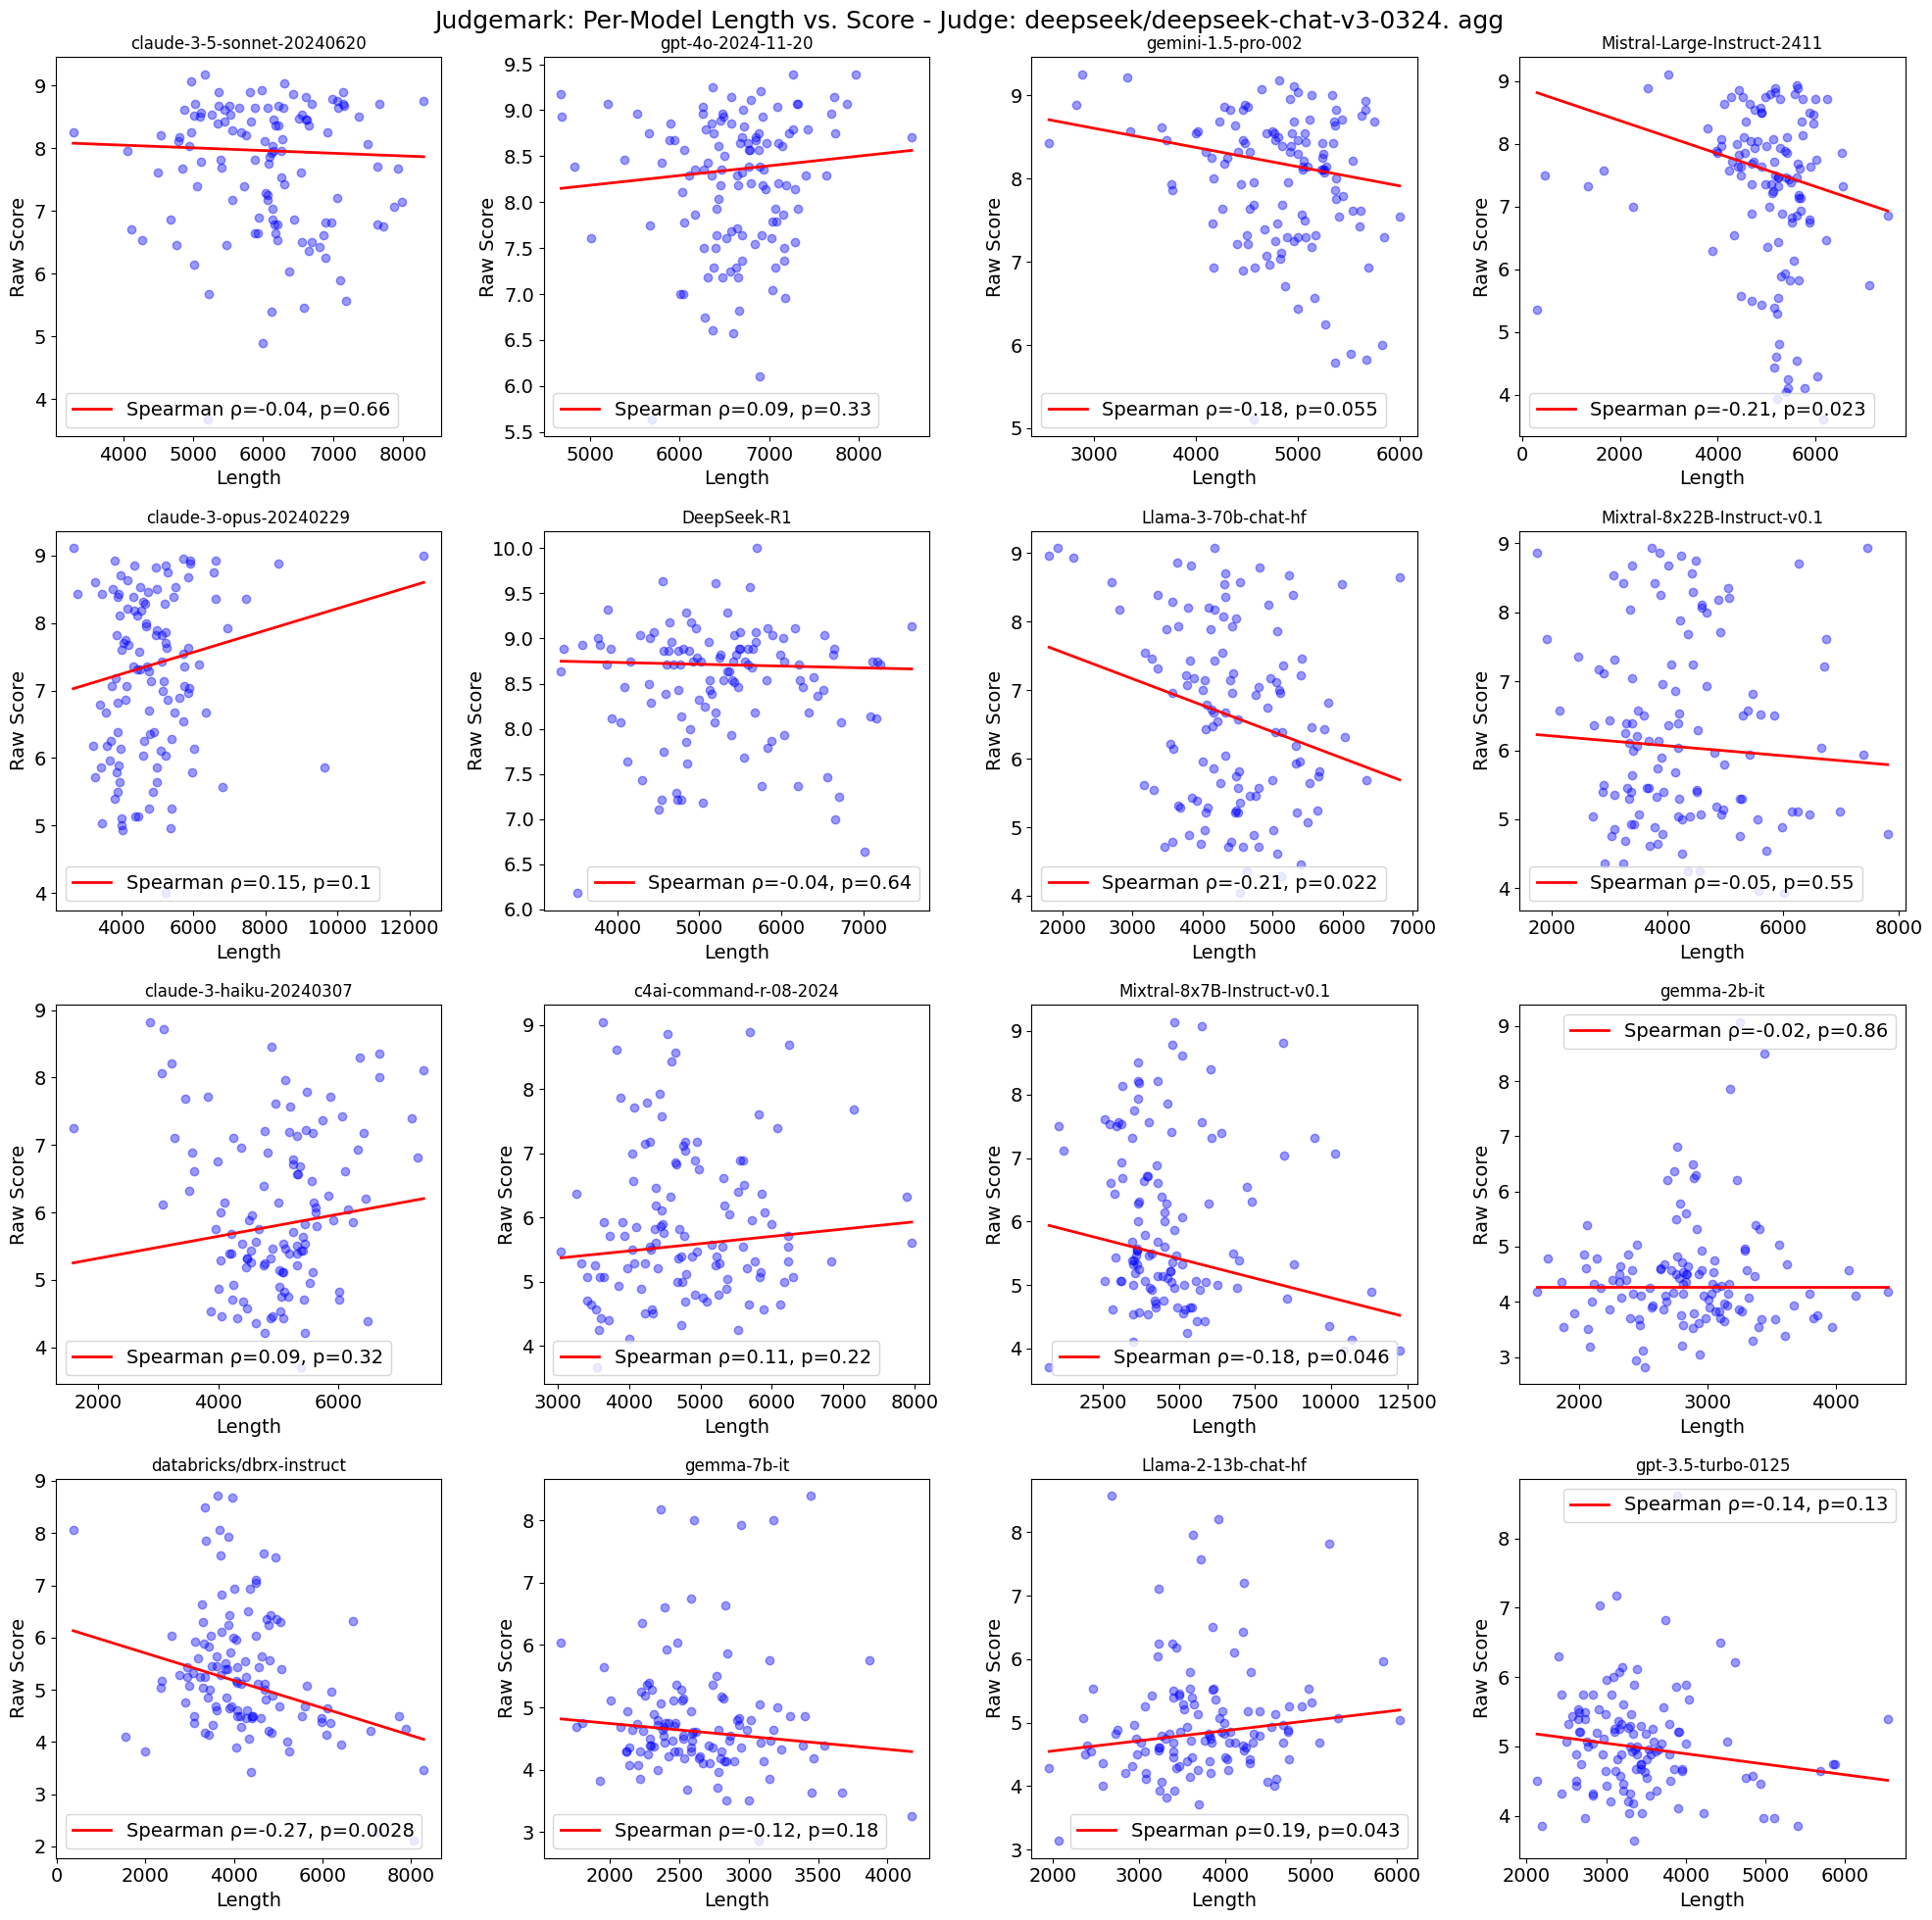


------- RAW SCORES Summary -------ANOVA F-value: 12.9462, p=0.0000Kruskal-Wallis: 286.0162, p=0.0000Pearson r=0.8248Kendall τ=0.6559Std.Dev across models: 0.0290
Model Scores:gpt-4o-2024-11-20....................... 3.403 ±0.006gemini-1.5-pro-002...................... 3.398 ±0.009claude-3-5-sonnet-20240620.............. 3.397 ±0.013gemini-1.5-pro-001...................... 3.396 ±0.007claude-3-opus-20240229.................. 3.393 ±0.011DeepSeek-R1............................. 3.393 ±0.009Mistral-Large-Instruct-2411............. 3.389 ±0.015Llama-3-70b-chat-hf..................... 3.366 ±0.017Mixtral-8x22B-Instruct-v0.1............. 3.359 ±0.018claude-3-haiku-20240307................. 3.351 ±0.017c4ai-command-r-08-2024.................. 3.351 ±0.017Mixtral-8x7B-Instruct-v0.1.............. 3.343 ±0.019databricks/dbrx-instruct................ 3.340 ±0.018gemma-7b-it............................. 3.332 ±0.019Llama-2-13b-chat-hf..................... 3.330 ±0.017gpt-3.5-turbo-0125...........

In [9]:
results['ranked'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_ranked")

## Norm logprob


--- RAW SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 0.625
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 4.381
CI99 Overlap pct: 0.385
Avg. |Cohen's d| for adjacent pairs: 0.352
Average EMD across all pairs: 1.119
Avg. CI95 half-width: 0.115 (modulated: 0.902)


--- CALIBRATED SEPARABILITY METRICS ---
Adjacent 99% CI Overlap fraction: 0.562
Sum of adjacent 99% CI Overlap magnitude (scale=1.5): 7.754
CI99 Overlap pct: 0.386
Avg. |Cohen's d| for adjacent pairs: 0.366
Average EMD across all pairs: 2.389
Avg. CI95 half-width: 0.221 (modulated: 0.618)



This one uses normalised logprobs to compute the ranked score


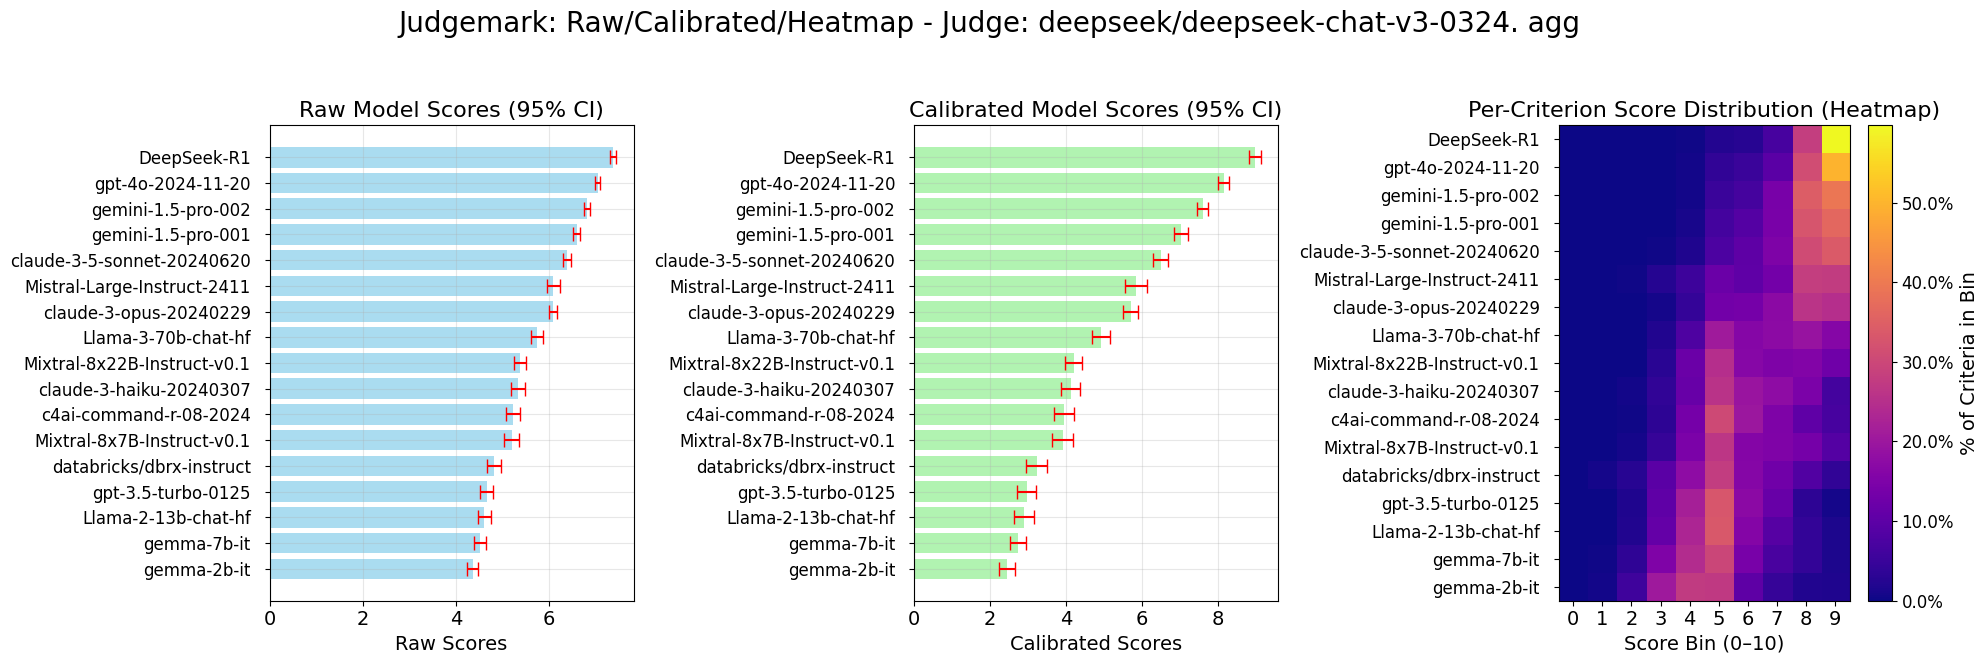

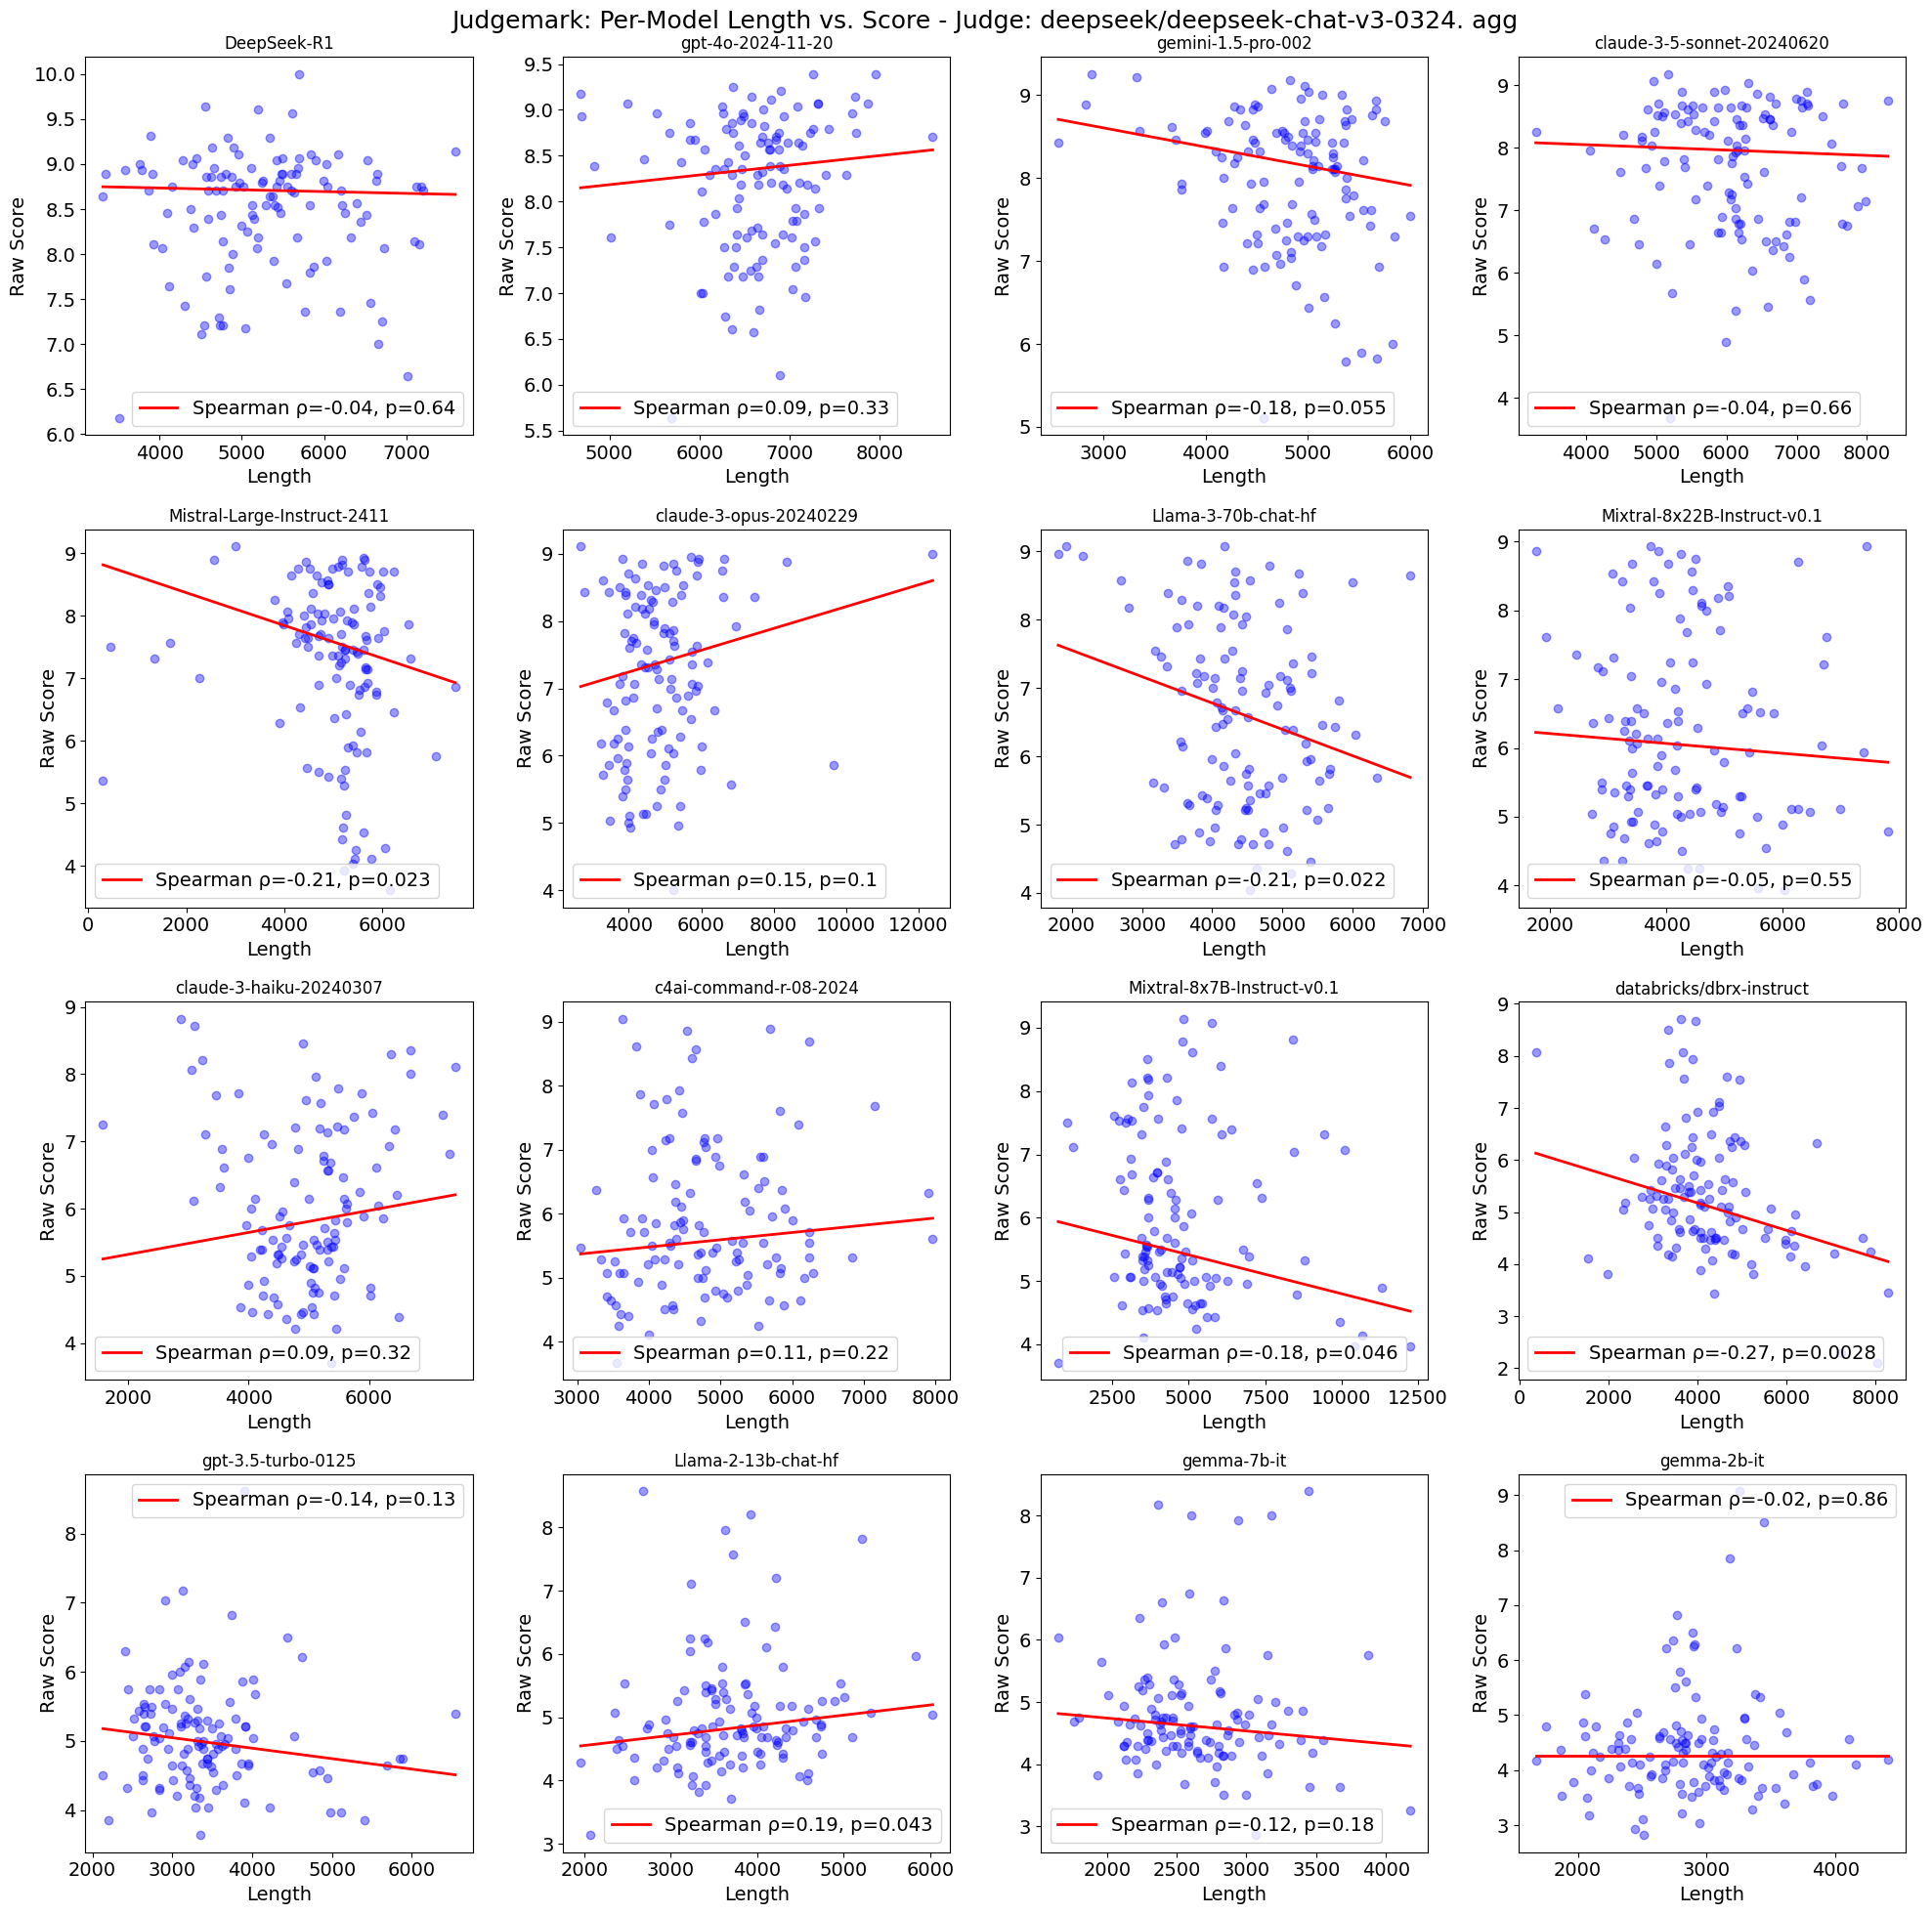


------- RAW SCORES Summary -------ANOVA F-value: 237.1369, p=0.0000Kruskal-Wallis: 1455.0520, p=0.0000Pearson r=0.9692Kendall τ=0.9118Std.Dev across models: 0.9188
Model Scores:DeepSeek-R1............................. 7.376 ±0.062gpt-4o-2024-11-20....................... 7.038 ±0.055gemini-1.5-pro-002...................... 6.813 ±0.061gemini-1.5-pro-001...................... 6.590 ±0.070claude-3-5-sonnet-20240620.............. 6.383 ±0.082Mistral-Large-Instruct-2411............. 6.088 ±0.143claude-3-opus-20240229.................. 6.080 ±0.094Llama-3-70b-chat-hf..................... 5.730 ±0.127Mixtral-8x22B-Instruct-v0.1............. 5.381 ±0.131claude-3-haiku-20240307................. 5.331 ±0.143c4ai-command-r-08-2024.................. 5.220 ±0.149Mixtral-8x7B-Instruct-v0.1.............. 5.192 ±0.157databricks/dbrx-instruct................ 4.819 ±0.158gpt-3.5-turbo-0125...................... 4.658 ±0.141Llama-2-13b-chat-hf..................... 4.608 ±0.143gemma-7b-it................

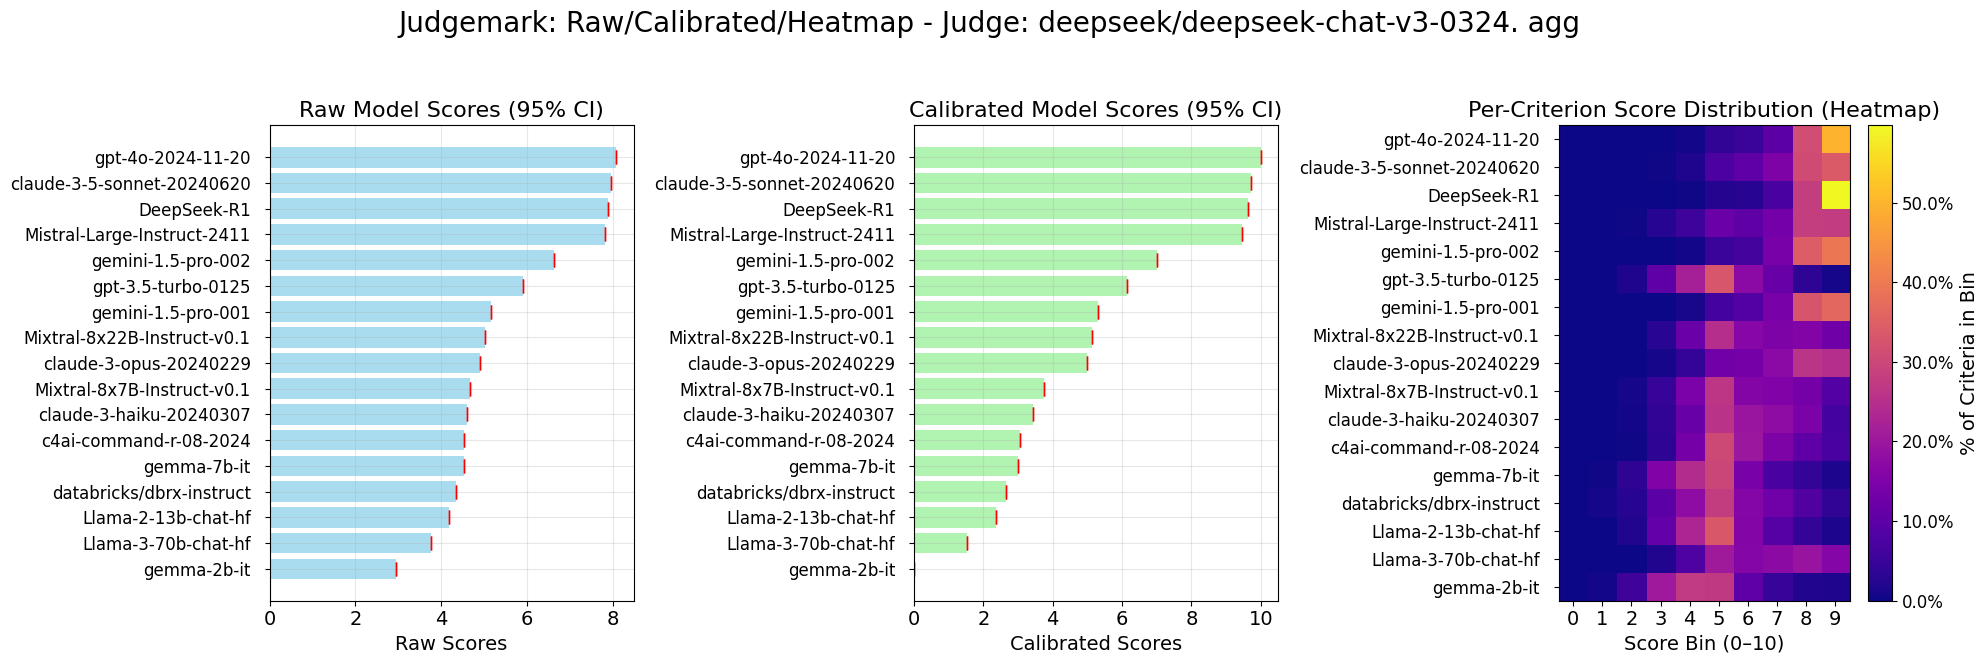

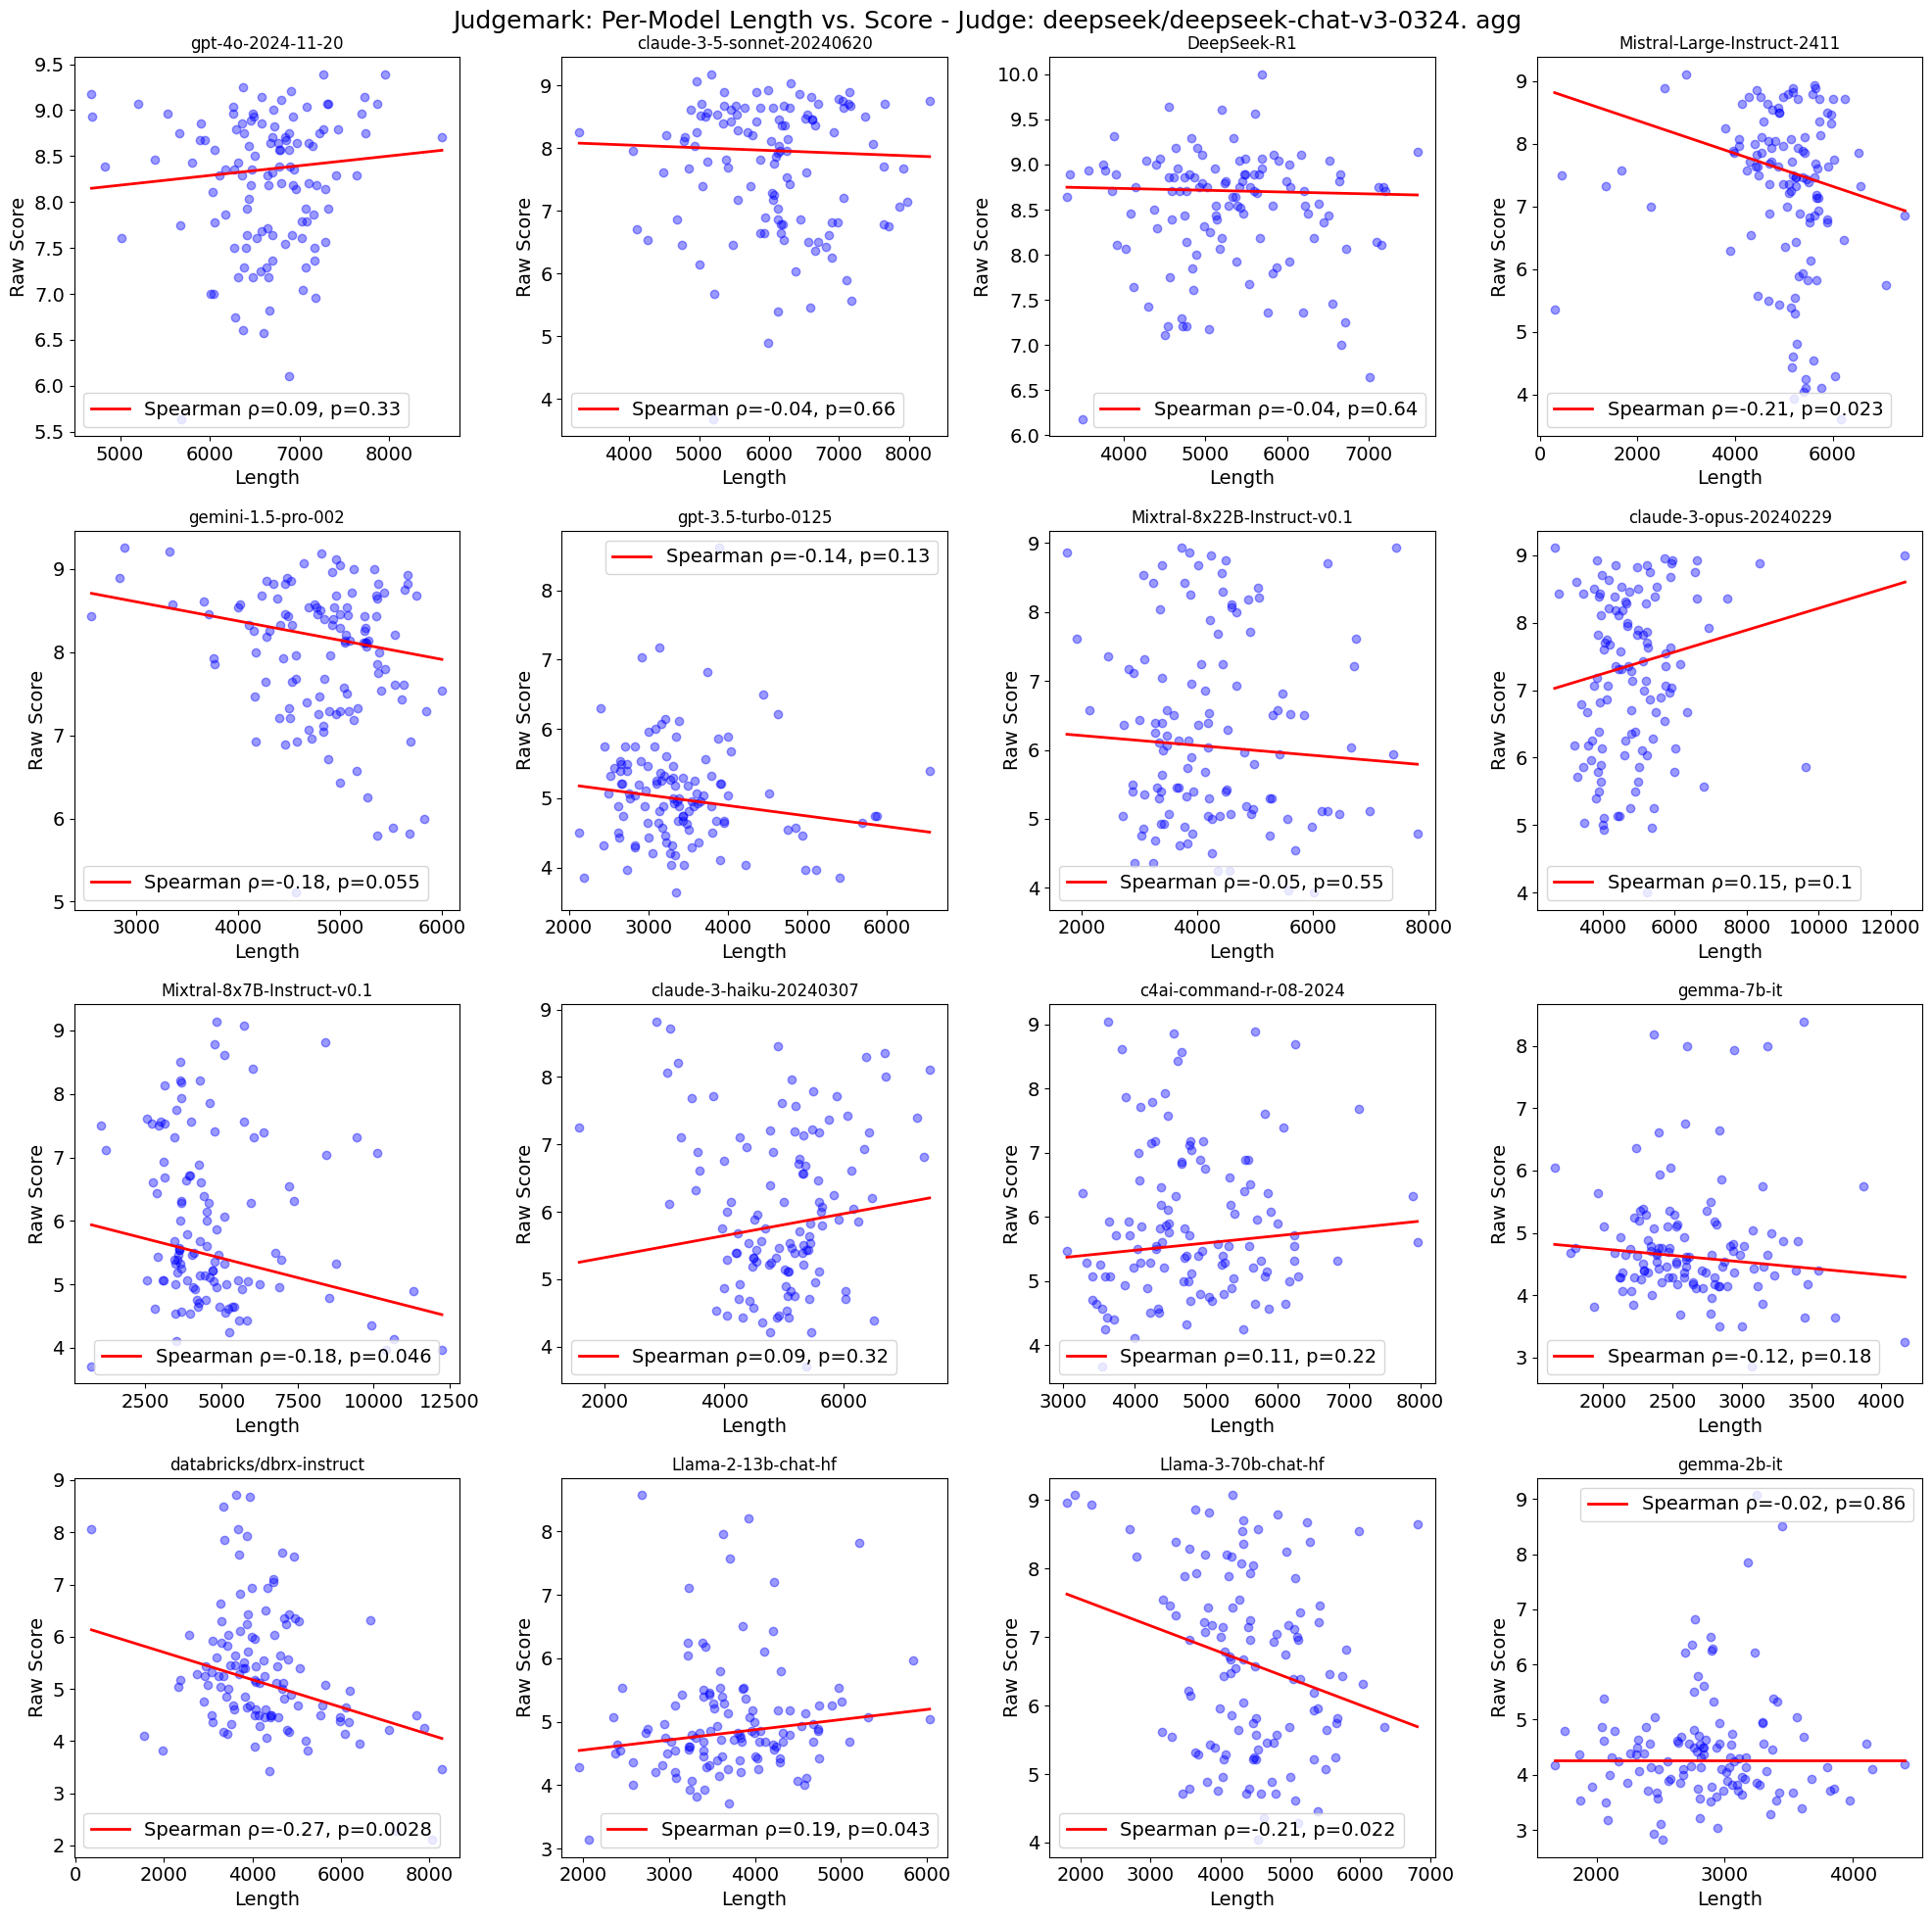


------- RAW SCORES Summary -------ANOVA F-value: inf, p=0.0000Kruskal-Wallis: 2039.0000, p=0.0000Pearson r=0.7643Kendall τ=0.5882Std.Dev across models: 1.5695
Model Scores:gpt-4o-2024-11-20....................... 8.070 ±0.000claude-3-5-sonnet-20240620.............. 7.940 ±0.000DeepSeek-R1............................. 7.890 ±0.000Mistral-Large-Instruct-2411............. 7.810 ±0.000gemini-1.5-pro-002...................... 6.630 ±0.000gpt-3.5-turbo-0125...................... 5.890 ±0.000gemini-1.5-pro-001...................... 5.160 ±0.000Mixtral-8x22B-Instruct-v0.1............. 5.010 ±0.000claude-3-opus-20240229.................. 4.890 ±0.000Mixtral-8x7B-Instruct-v0.1.............. 4.660 ±0.000claude-3-haiku-20240307................. 4.600 ±0.000c4ai-command-r-08-2024.................. 4.530 ±0.000gemma-7b-it............................. 4.520 ±0.000databricks/dbrx-instruct................ 4.330 ±0.000Llama-2-13b-chat-hf..................... 4.180 ±0.000Llama-3-70b-chat-hf.............

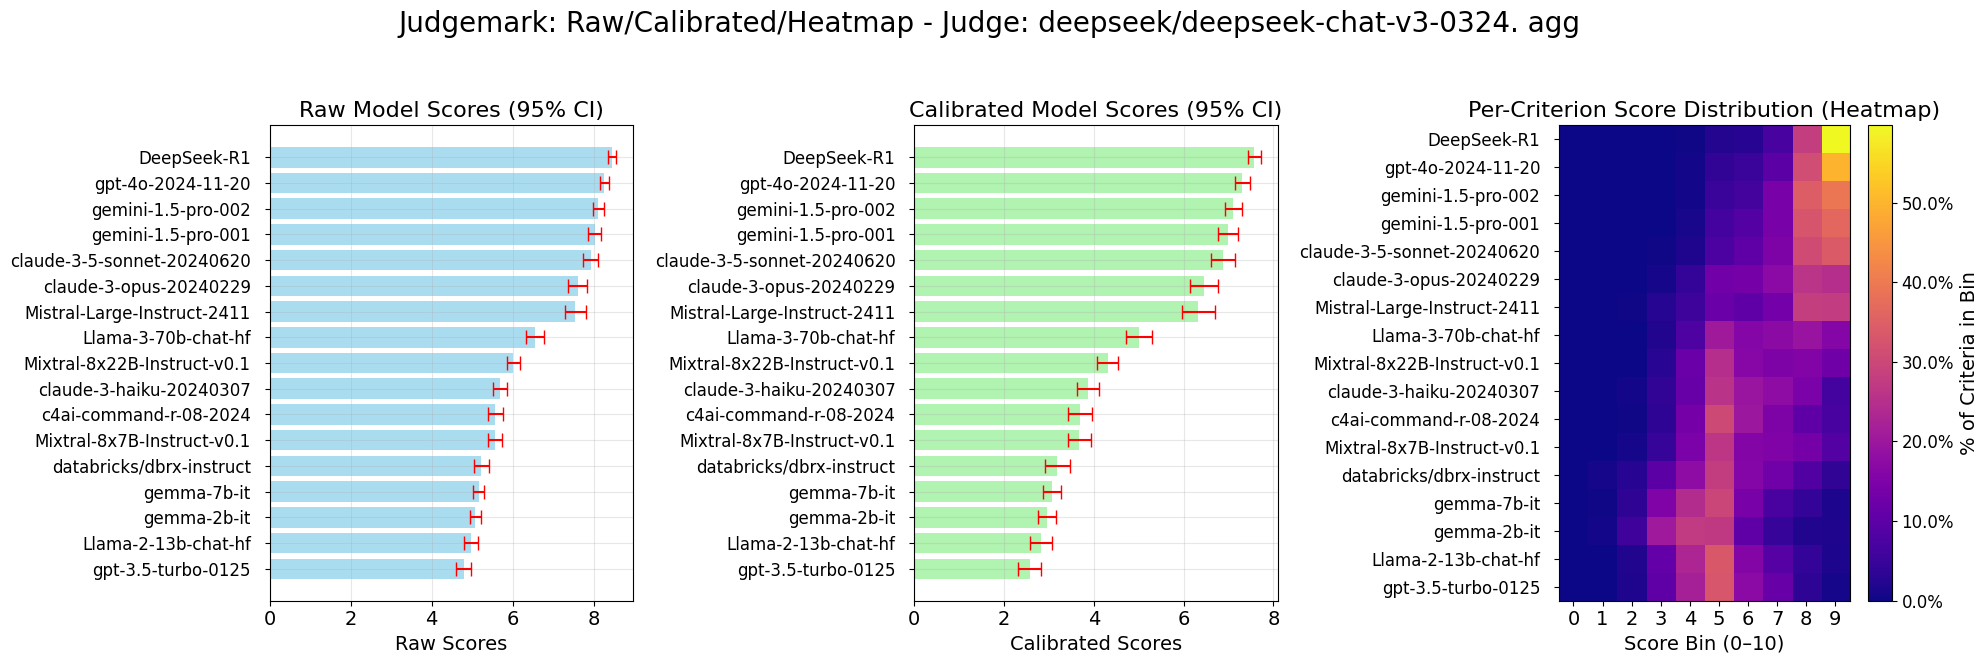

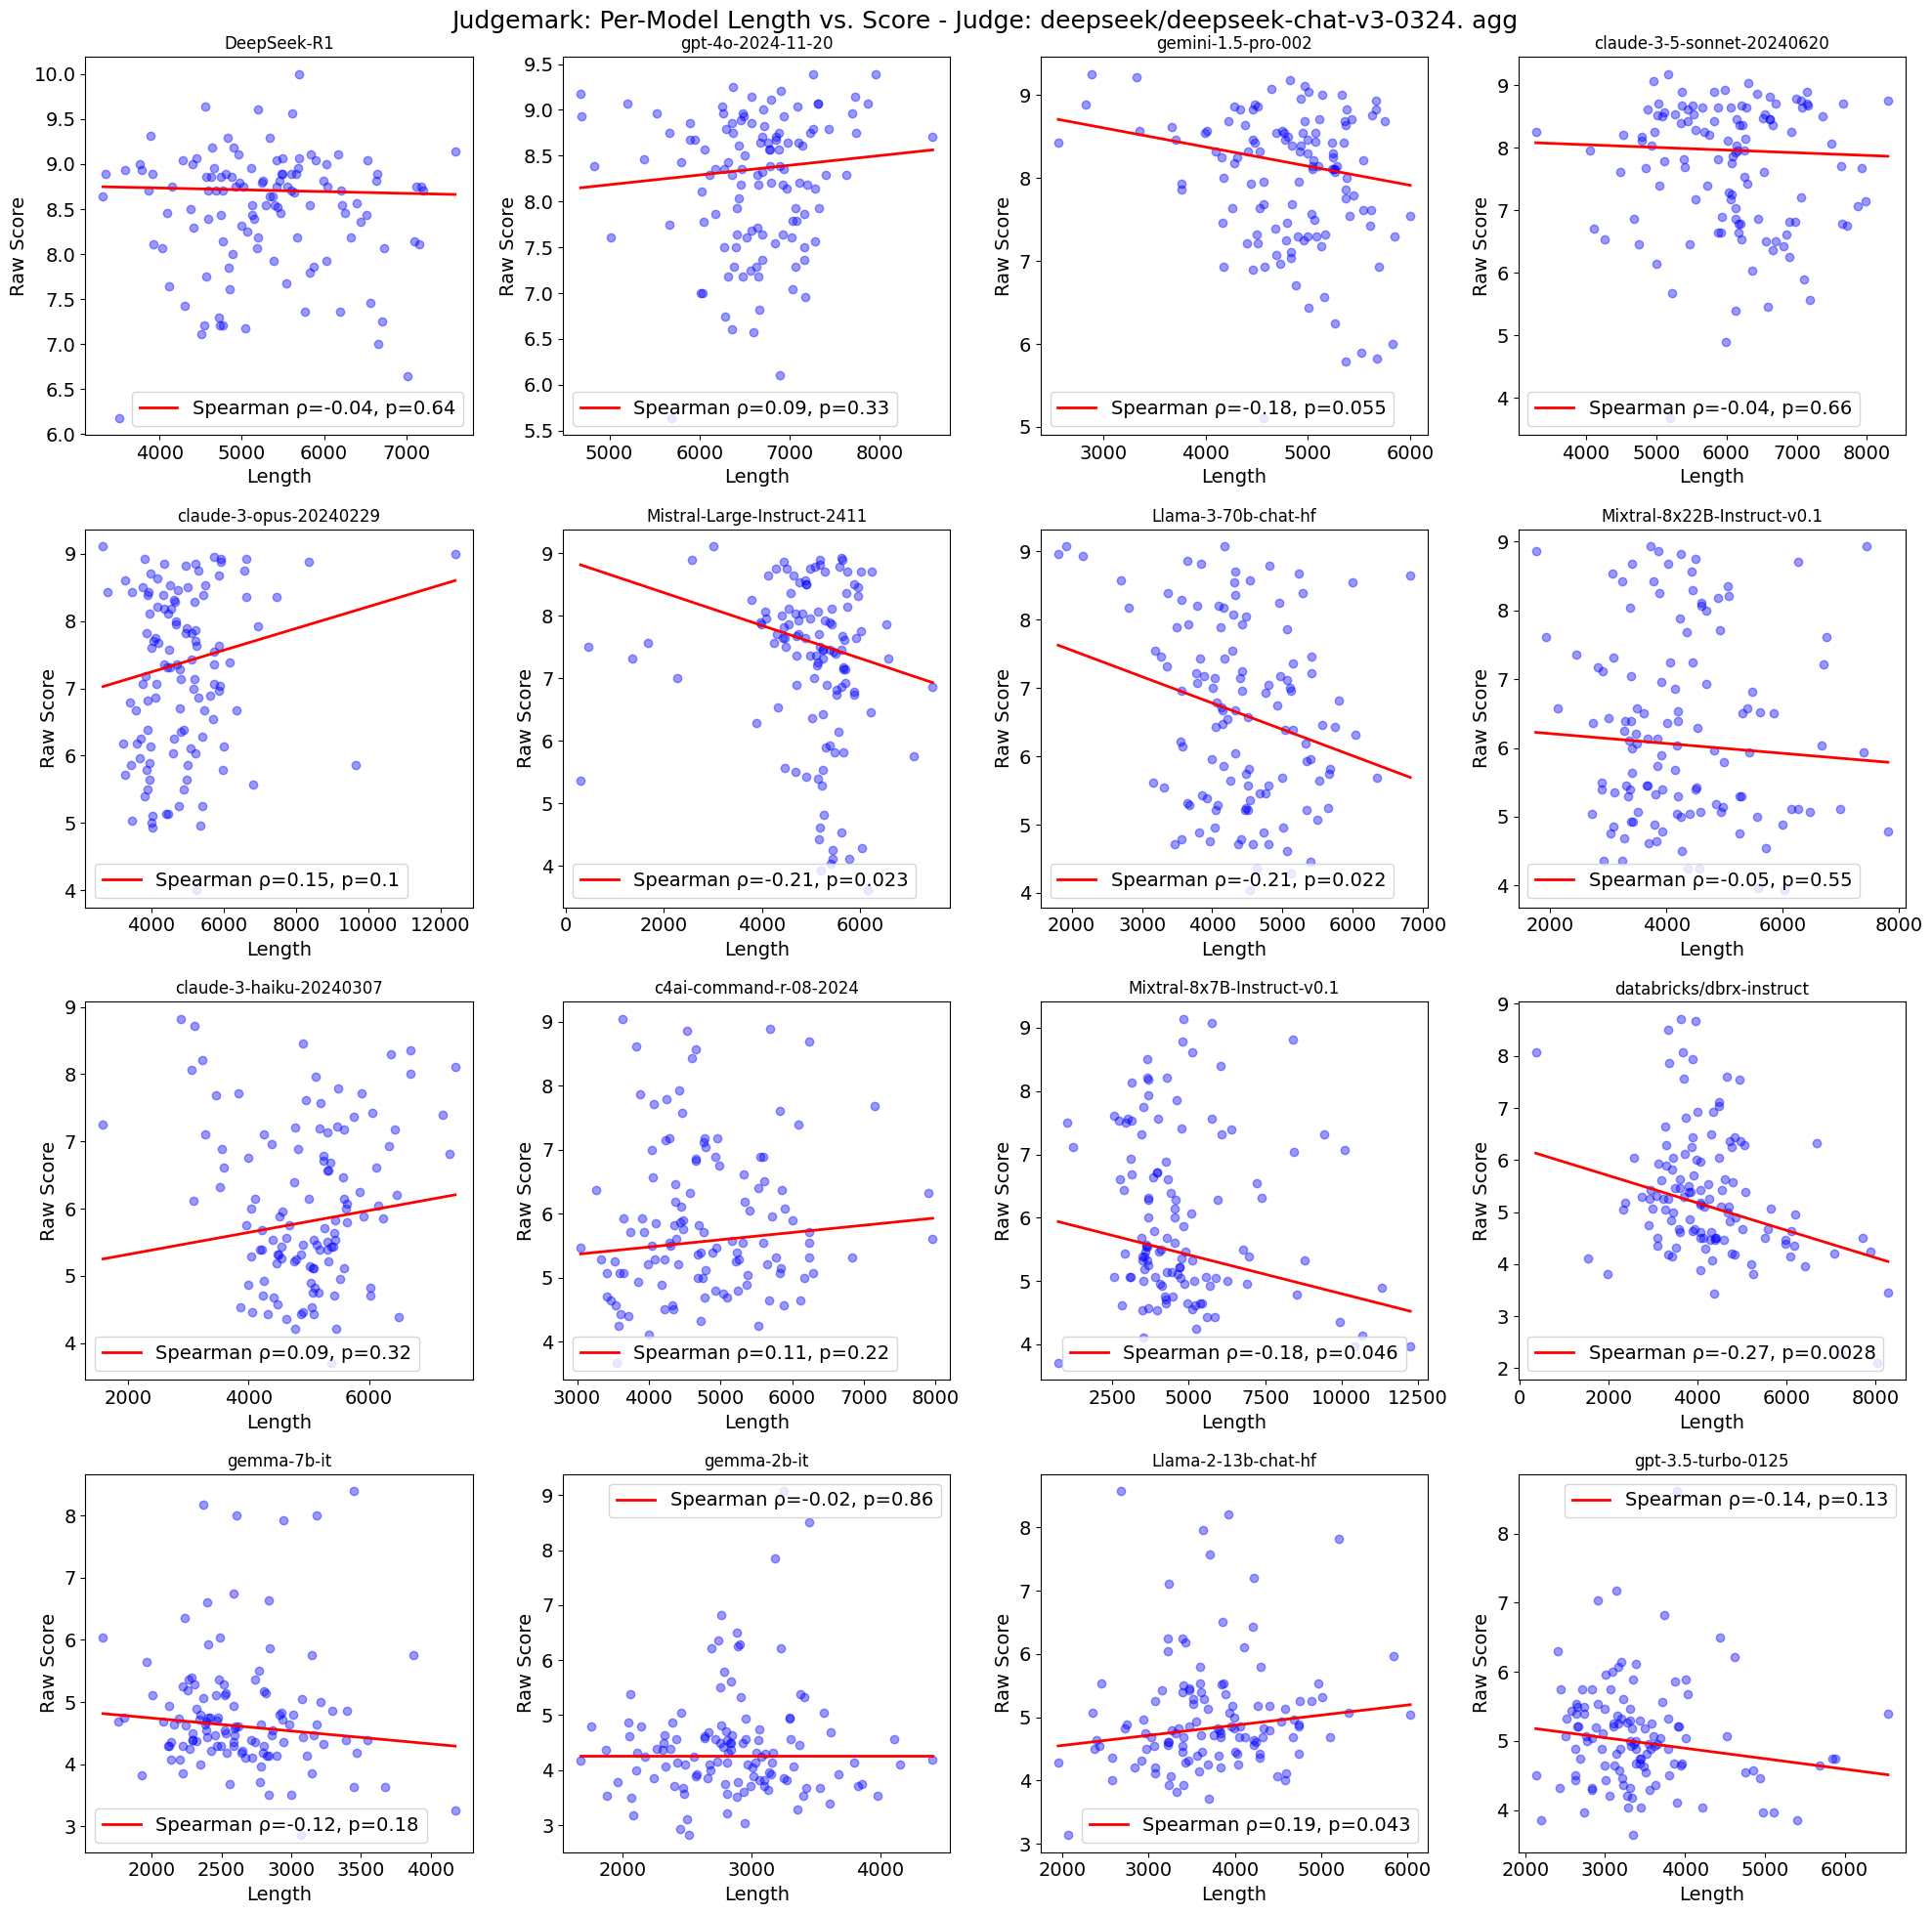


------- RAW SCORES Summary -------ANOVA F-value: 224.9133, p=0.0000Kruskal-Wallis: 1278.7915, p=0.0000Pearson r=0.9270Kendall τ=0.8235Std.Dev across models: 1.3180
Model Scores:DeepSeek-R1............................. 8.445 ±0.101gpt-4o-2024-11-20....................... 8.262 ±0.116gemini-1.5-pro-002...................... 8.114 ±0.142gemini-1.5-pro-001...................... 8.021 ±0.167claude-3-5-sonnet-20240620.............. 7.923 ±0.191claude-3-opus-20240229.................. 7.602 ±0.228Mistral-Large-Instruct-2411............. 7.542 ±0.263Llama-3-70b-chat-hf..................... 6.551 ±0.218Mixtral-8x22B-Instruct-v0.1............. 6.012 ±0.163claude-3-haiku-20240307................. 5.687 ±0.169c4ai-command-r-08-2024.................. 5.567 ±0.182Mixtral-8x7B-Instruct-v0.1.............. 5.559 ±0.179databricks/dbrx-instruct................ 5.219 ±0.186gemma-7b-it............................. 5.158 ±0.136gemma-2b-it............................. 5.077 ±0.144Llama-2-13b-chat-hf........

In [10]:
for model_name in (run['results'].keys()):
    logprobs = []
    for iteration_key in (run['results'][model_name].keys()):
        for item_id in (run['results'][model_name][iteration_key].keys()):
            storage_dict = run['results'][model_name][iteration_key][item_id]
            logp = storage_dict['logp']
            lpv = list(logp.values())
            if len(lpv) == 0:
                continue
            logprobs.append(np.stack(lpv))
    
    logprobs2 = np.concatenate(logprobs)
    log_prob_mean = logprobs2.mean(0)

    for iteration_key in (run['results'][model_name].keys()):
        for item_id in (run['results'][model_name][iteration_key].keys()):
            storage_dict = run['results'][model_name][iteration_key][item_id]
            logp_norm = {k: v - log_prob_mean for i, (k, v) in enumerate(storage_dict['logp'].items())}

            def store_or_delete(storage_dict, key, value):
                if value is not None:
                    assert np.isfinite(value), f"Score for {model_name} {iteration_key} {item_id} is not finite: {value}"
                    storage_dict[key] = value
                elif key in storage_dict:
                    del storage_dict[key]

            extracted_rscores_norm = compute_ranked_score(logp_norm)
            ranked_score_norm = compute_raw_score(extracted_rscores_norm)
            store_or_delete(storage_dict, "aggregated_score_ranked_norm", ranked_score_norm)

            extracted_rscores = compute_ranked_score(logp)
            ranked_score = compute_raw_score(extracted_rscores)
            store_or_delete(storage_dict, "aggregated_score_ranked", ranked_score)

            extracted_wscore = compute_weighted_score(logp_norm)
            weighted_score_norm = compute_raw_score(extracted_wscore)
            store_or_delete(storage_dict, "aggregated_score_weighted_norm", weighted_score_norm)

            # extracted_scores, logp = parse_scores('', logp_norm)
            # extracted_raw_score_norm = compute_raw_score(extracted_scores)
            # raw_score_norm = extracted_raw_score_norm
            # store_or_delete(storage_dict, "aggregated_score_raw_norm", raw_score_norm)

            run['results'][model_name][iteration_key][item_id] = storage_dict

runs[run_id] = run

print('This one uses normalised logprobs to compute the ranked score')
results['ranked_norm'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_ranked_norm", do_plot=1)

results['ranked_scaled'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_ranked", do_plot=1)

# results['raw_norm'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_raw_norm", do_plot=1)

results['weighted_norm'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_weighted_norm", do_plot=1)

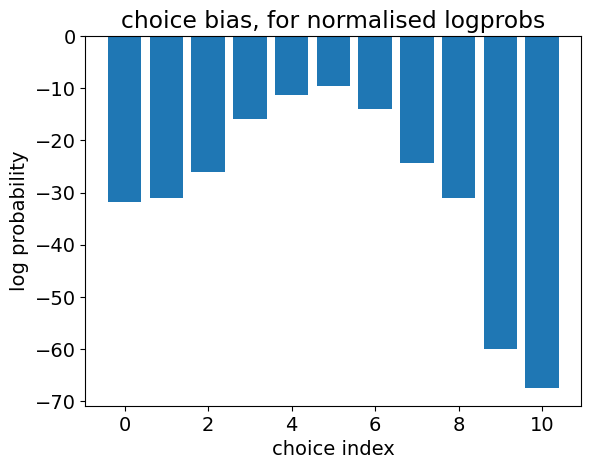

In [11]:
from matplotlib import pyplot as plt
plt.bar(range(11), log_prob_mean)
plt.title('choice bias, for normalised logprobs')
plt.xlabel('choice index')
plt.ylabel('log probability')
plt.show()

In [12]:
import polars as pl

In [13]:
a = pl.DataFrame({k:v['final_judgemark_score_raw'] for k, v in results.items()}).transpose(include_header=True, 
                                                                                           header_name="name"
                                                                                           ).rename({'column_0': 'score'})#.sort(by='score', descending=True)
# a


In [14]:
b = pl.DataFrame({k:v['final_judgemark_score_calibrated'] for k, v in results.items()}).transpose(include_header=True, header_name="name"
                                                                                           ).rename({'column_0': 'score_norm'})#.sort(by='score_norm', descending=True)
# b

In [15]:
# pl.concat([a, b], how='horizontal')
df = a.join(b, on='name', how='inner').sort(by='score_norm', descending=True)
df

shape: (6, 3)
┌───────────────┬──────────┬────────────┐
│ name          ┆ score    ┆ score_norm │
│ ---           ┆ ---      ┆ ---        │
│ str           ┆ f64      ┆ f64        │
╞═══════════════╪══════════╪════════════╡
│ ranked_scaled ┆ 0.629332 ┆ 0.801803   │
│ ranked_norm   ┆ 0.654562 ┆ 0.743491   │
│ weighted      ┆ 0.634804 ┆ 0.65975    │
│ raw           ┆ 0.634528 ┆ 0.65895    │
│ weighted_norm ┆ 0.623806 ┆ 0.644149   │
│ ranked        ┆ 0.336333 ┆ 0.283982   │
└───────────────┴──────────┴────────────┘

In [16]:
from IPython.display import display, Markdown

with pl.Config(tbl_formatting="MARKDOWN",
    tbl_hide_column_data_types=True,
    tbl_hide_dataframe_shape=True,) as cfg:
    print(df)

| name          | score    | score_norm |
|---------------|----------|------------|
| ranked_scaled | 0.629332 | 0.801803   |
| ranked_norm   | 0.654562 | 0.743491   |
| weighted      | 0.634804 | 0.65975    |
| raw           | 0.634528 | 0.65895    |
| weighted_norm | 0.623806 | 0.644149   |
| ranked        | 0.336333 | 0.283982   |


In [17]:
# import polars as pl
# # pd.DataFrame([r1, r2, r3]).rename(columns={0: "raw", 1: "weighted", 2: "ranked"}).round(3)
# df = pl.DataFrame([r1, r2, r3, r3_n]).rename({"final_judgemark_score_raw": "raw", "final_judgemark_score_calibrated": "weighted"})
# df = df.with_columns(names=pl.lit(pl.Series(["raw", "weighted", "ranked", "ranked_normalized"])))
# # df.style
# print(df)

## Choose best of multiple combinations of choices

In [18]:
# TODO try all ordered subset of choices
choices = np.arange(11).tolist()  # Choices are 0-10

# even numbers are 0, 2, 4, 6, 8, 10
# odd numbers are 1, 3, 5, 7, 9

import itertools
popular_perms = [choices]
choices_even = [c for c in choices if c % 2 == 0]
choices_odd = [c for c in choices if c % 2 != 0]
for i in range(3, 6):
    popular_perms += list(itertools.combinations(choices_even, i))
    popular_perms += list(itertools.combinations(choices_odd, i))
print(f"Total combinations: {len(popular_perms)}")


choice_perms = []
for i in range(3, 12):
    choice_perms += list(itertools.combinations(choices, i))
len(choice_perms)

# now only keep the choices with middle numbers, and even values
middle_choices = [c for c in choices if c % 2 == 0]
filtered_perms = [p for p in choice_perms if all(x in middle_choices for x in p)]
len(choice_perms), len(middle_choices), len(filtered_perms)

Total combinations: 58


(1981, 6, 42)

In [ ]:
from scipy.stats import kendalltau


def normed_kendalltau(res, choices, use_pvalue=True):
    wc = res.correlation 
    if use_pvalue:
        wc *=  (1 - res.pvalue)
    rng = max(choices) - min(choices)
    decision_norm = wc * 2 - 1
    decision_scaled = decision_norm * rng + min(choices)
    return decision_scaled

def compute_ranked_score2(logp):
    outs = {}
    for metric, logp_arr in logp.items():
        best = None
        best_choices = None
        for choices in popular_perms:
            logp_arr_subset = [logp_arr[i] for i in choices]
            res = kendalltau(choices, logp_arr_subset, variant='b')
            v = normed_kendalltau(res, choices)
            if best is None:
                best = v
                best_choices = choices
                best_res = res
            if res.pvalue < 0.3 and v > best:
                best = v
                best_choices = choices
                best_res = res

        # scale my max and min value in choices
        v = normed_kendalltau(best_res, best_choices, use_pvalue=False)


        # decision = (best+1)*5 # scale to 0-10
        # decision = (2*decision*res.pvalue).clip(0, 10)
        if hasattr(v, 'item'):
            v = v.item()
        outs[metric] = v

    return outs

# compute_ranked_score2(logp)
# 6 mins
for model_name in tqdm(run['results'].keys()):
    for iteration_key in tqdm(run['results'][model_name].keys()):
        for item_id in tqdm(run['results'][model_name][iteration_key].keys()):
            storage_dict = run['results'][model_name][iteration_key][item_id]
            logp = storage_dict['logp']
            extracted_rscores = compute_ranked_score2(logp)
            ranked_score = compute_raw_score(extracted_rscores)
            if 'aggregated_score_ranked' in storage_dict:
                del storage_dict["aggregated_score_ranked"]
            if ranked_score is not None:
                assert np.isfinite(ranked_score), f"Ranked score for {model_name} {iteration_key} {item_id} is not finite: {ranked_score}"
                storage_dict["aggregated_score_ranked"] = ranked_score

            run['results'][model_name][iteration_key][item_id] = storage_dict

runs[run_id] = run

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:

print('This one uses normalised logprobs to compute the ranked score')
results['ranked_combinations'] = finalize_scores_and_compute_judgemark(runs, run_id, samples_data, score_key="aggregated_score_ranked")

# Other

In [ ]:
results